In [9]:
# relevent libraries

# install.packages("quantmod")
# install.packages("fredr")
# install.packages("ggfortify")
# install.packages('urca')
# install.packages("tseries")
# install.packages("forecast")
# install.packages("dynlm")
# install.packages("stargazer")
# install.packages("pracma")
# install.packages("dLagM")
# install.packages("gets")
# install.packages("car")
# install.packages("lmtest")
# install.packages("vars")
# install.packages("tseries")
# install.packages("strucchange")
# install.packages("graphics")
# install.packages("grDevices")
# install.packages("tsDyn")
options(warn=-1)

In [10]:
library(xts)
library(zoo)
library(ggplot2)
library(ggfortify)
library(urca)
library(forecast)

In [11]:
data <- read.csv('dataset.csv')

head(data)

tail(data)

,Date,Europe.Brent.Spot.Price.FOB,Monthly.OECD.petroleum.and.other.liquids.stocks,World.Industrial.Production.index,OPEC.Production..million.b.d.,Baltic.Dry.Index..BADI.
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,Jan-00,25.51,3768.491,NA,24.18,1319
2,Feb-00,27.78,3744.295,NA,24.95,1531
3,Mar-00,27.49,3731.368,NA,24.91,1660
4,Apr-00,22.76,3770.587,NA,25.69,1628
5,May-00,27.74,3789.751,NA,26.25,1566
6,Jun-00,29.80,3820.624,NA,25.83,1616


,Date,Europe.Brent.Spot.Price.FOB,Monthly.OECD.petroleum.and.other.liquids.stocks,World.Industrial.Production.index,OPEC.Production..million.b.d.,Baltic.Dry.Index..BADI.
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
295,Jul-24,85.15,4032.39,107.26,29.04,1708
296,Aug-24,80.36,4047.26,107.38,28.94,1814
297,Sep-24,74.02,4016.63,107.61,28.23,2084
298,Oct-24,75.63,3981.54,108.16,28.71,1388
299,Nov-24,74.35,3979.63,108.16,28.74,1354
300,Dec-24,73.86,3975.76,109.04,28.82,997


In [12]:
# convert "Jan-90" to yearmon (monthly format)
d1 <- as.yearmon(data[,1], format = "%b-%y")

# convert to xts
Brent <- xts(data[,2], order.by = d1) # date-indexed series (Crude Oil Prices: Brent - Europe)

# we have no missing values on Brent, but we omit just in case
Brent = na.omit(Brent)              

In [13]:
# we repeat the same process for the other series
Oil_Stocks <- xts(data[,3], order.by = d1)
Oil_Stocks = na.omit(Oil_Stocks)

WIP <- xts(data[,4], order.by = d1)
WIP = na.omit(WIP) # We do not have values of WIP before Jan 2016, all values before are omitted


OPEC <- xts(data[,5], order.by = d1)
OPEC = na.omit(OPEC)

BDI <- xts(data[,6], order.by = d1)
BDI = na.omit(BDI)

In [14]:
head(Brent)
tail(Brent)

          [,1]
Jan 2000 25.51
Feb 2000 27.78
Mar 2000 27.49
Apr 2000 22.76
May 2000 27.74
Jun 2000 29.80

          [,1]
Jul 2024 85.15
Aug 2024 80.36
Sep 2024 74.02
Oct 2024 75.63
Nov 2024 74.35
Dec 2024 73.86

Data goes from Jan 2000 to Dec 2024

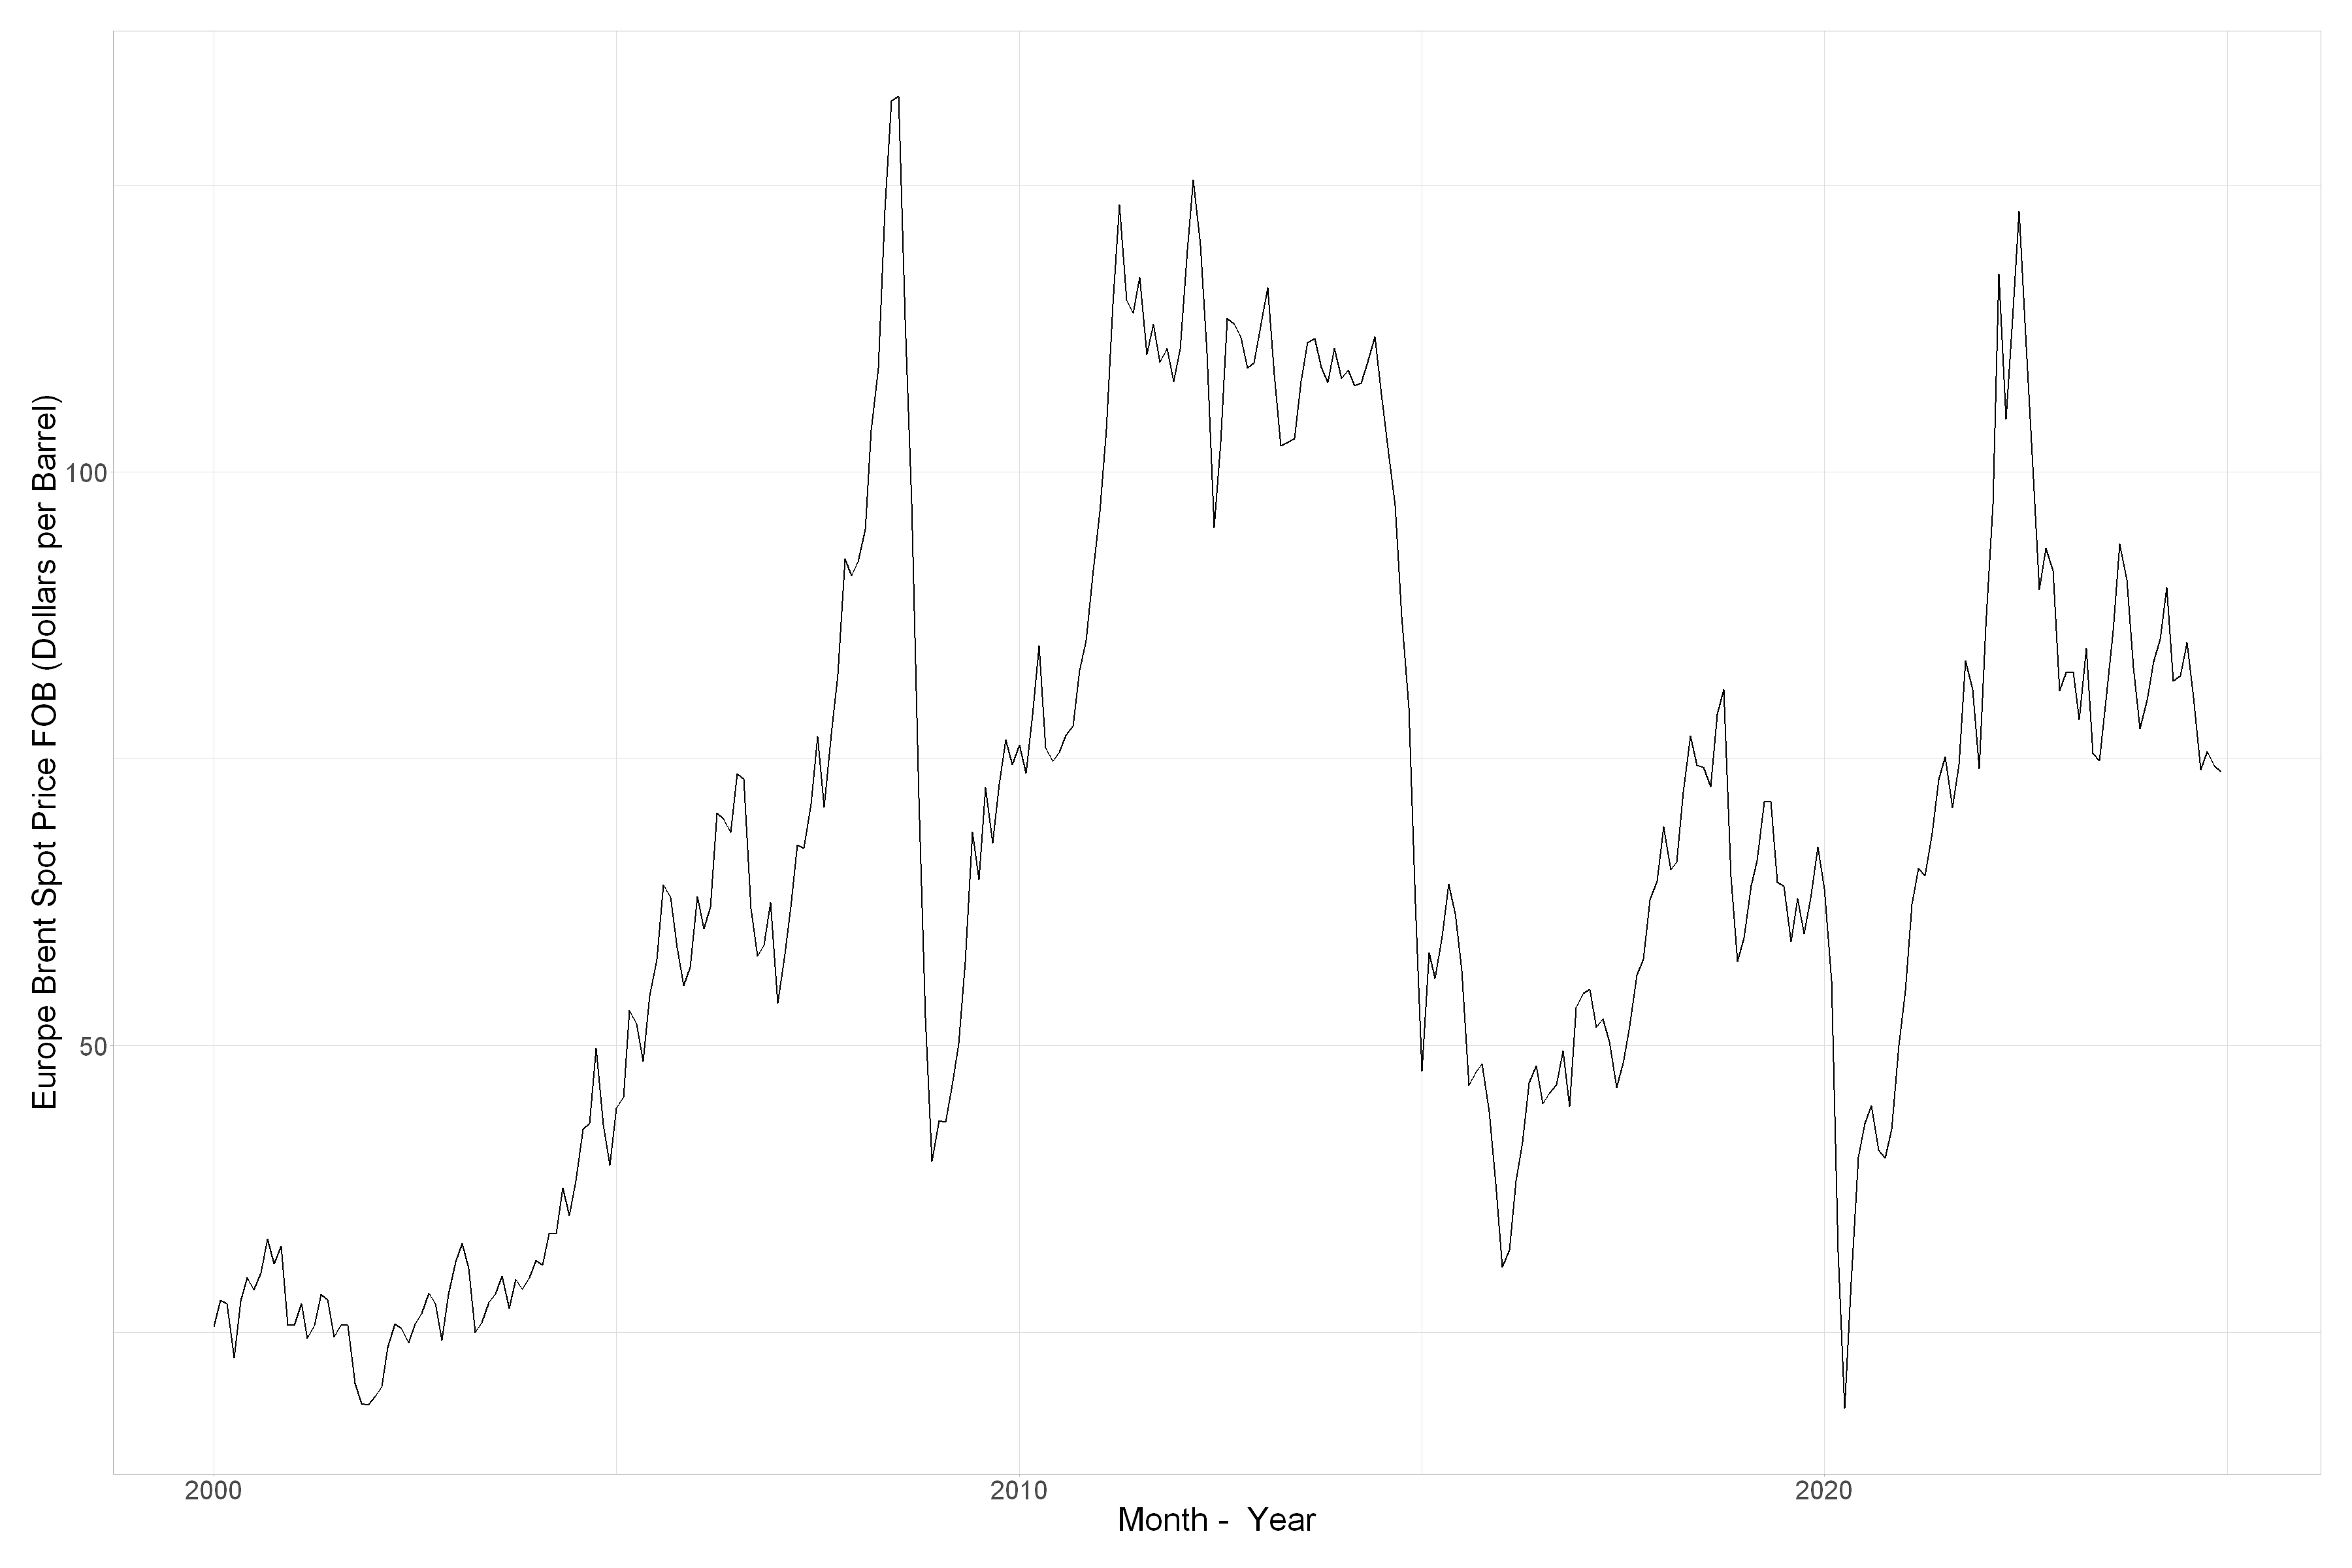

In [15]:
options(repr.plot.width=30, repr.plot.height=20)

fig = autoplot(Brent, size = .8, colour = 'black')
fig = fig +
theme_light() +
theme(plot.margin = ggplot2::margin(1, 1, 1, 1, "cm")) +
theme(text=element_text(size=30)) +
labs(x = "Month -  Year") +
labs(y = "Europe Brent Spot Price FOB (Dollars per Barrel)")
fig

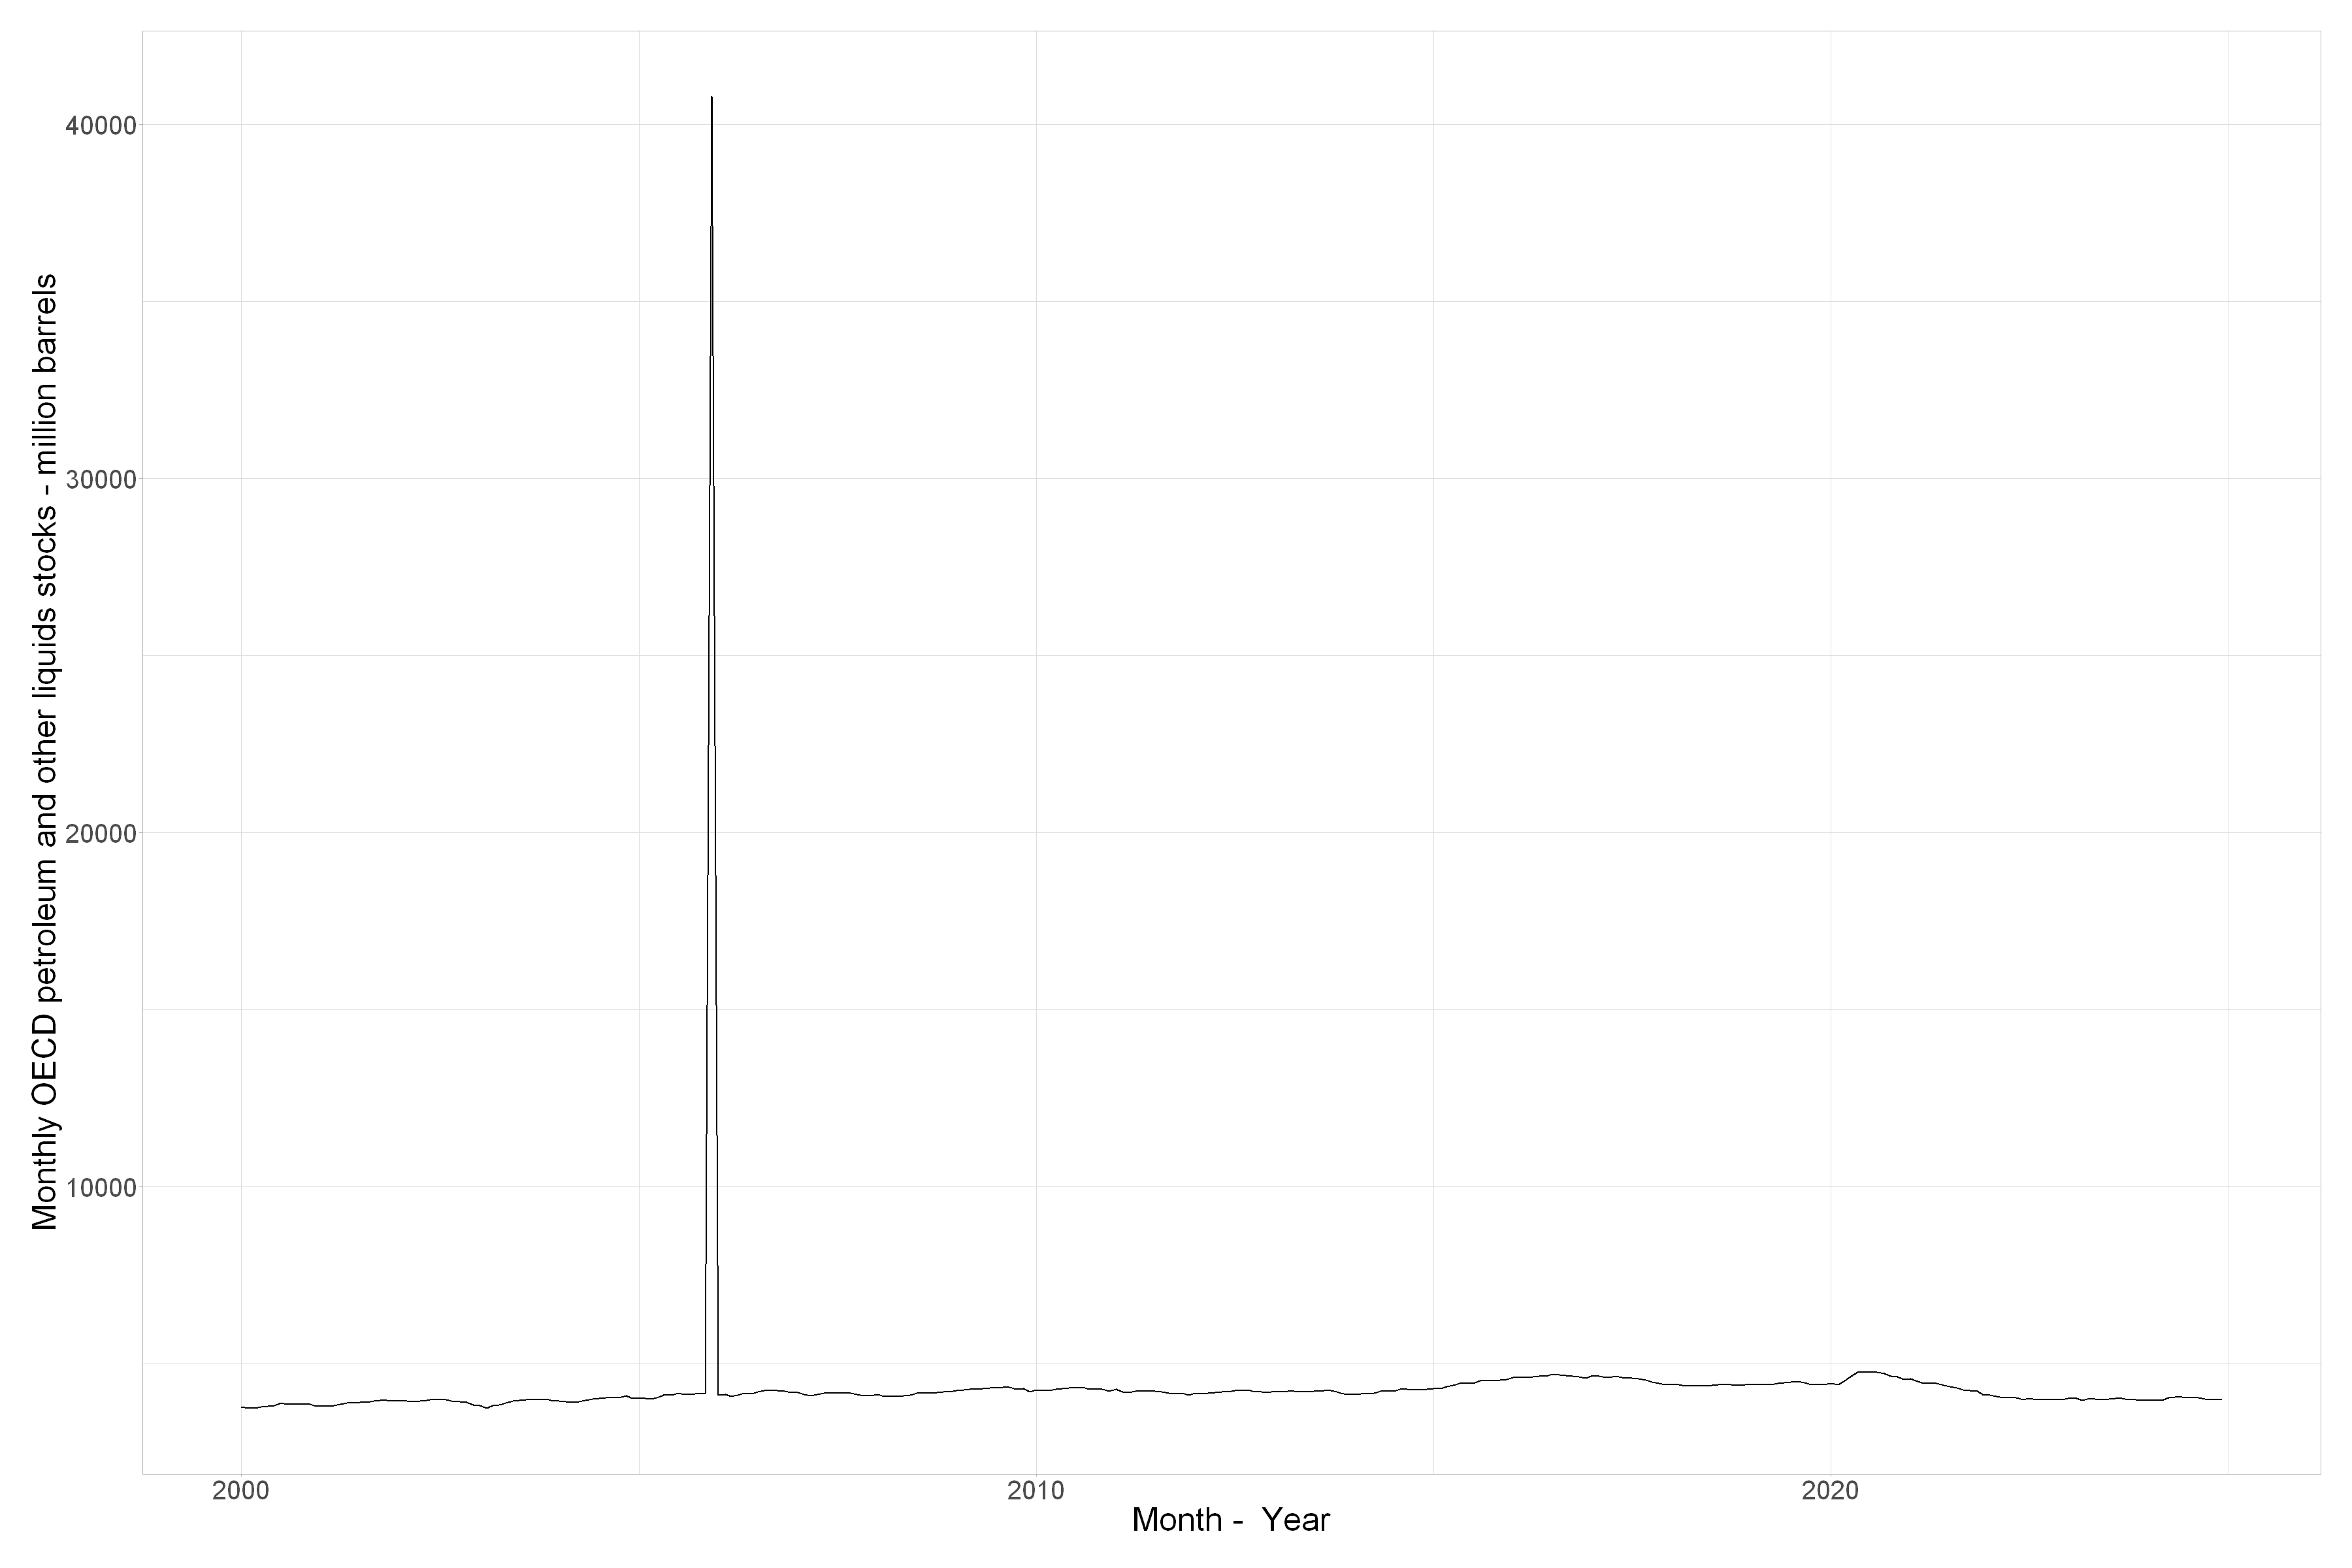

In [16]:
options(repr.plot.width=30, repr.plot.height=20)

fig = autoplot(Oil_Stocks, size = .8, colour = 'black')
fig = fig +
theme_light() +
theme(plot.margin = ggplot2::margin(1, 1, 1, 1, "cm")) +
theme(text=element_text(size=30)) +
labs(x = "Month -  Year") +
labs(y = "Monthly OECD petroleum and other liquids stocks - million barrels")
fig

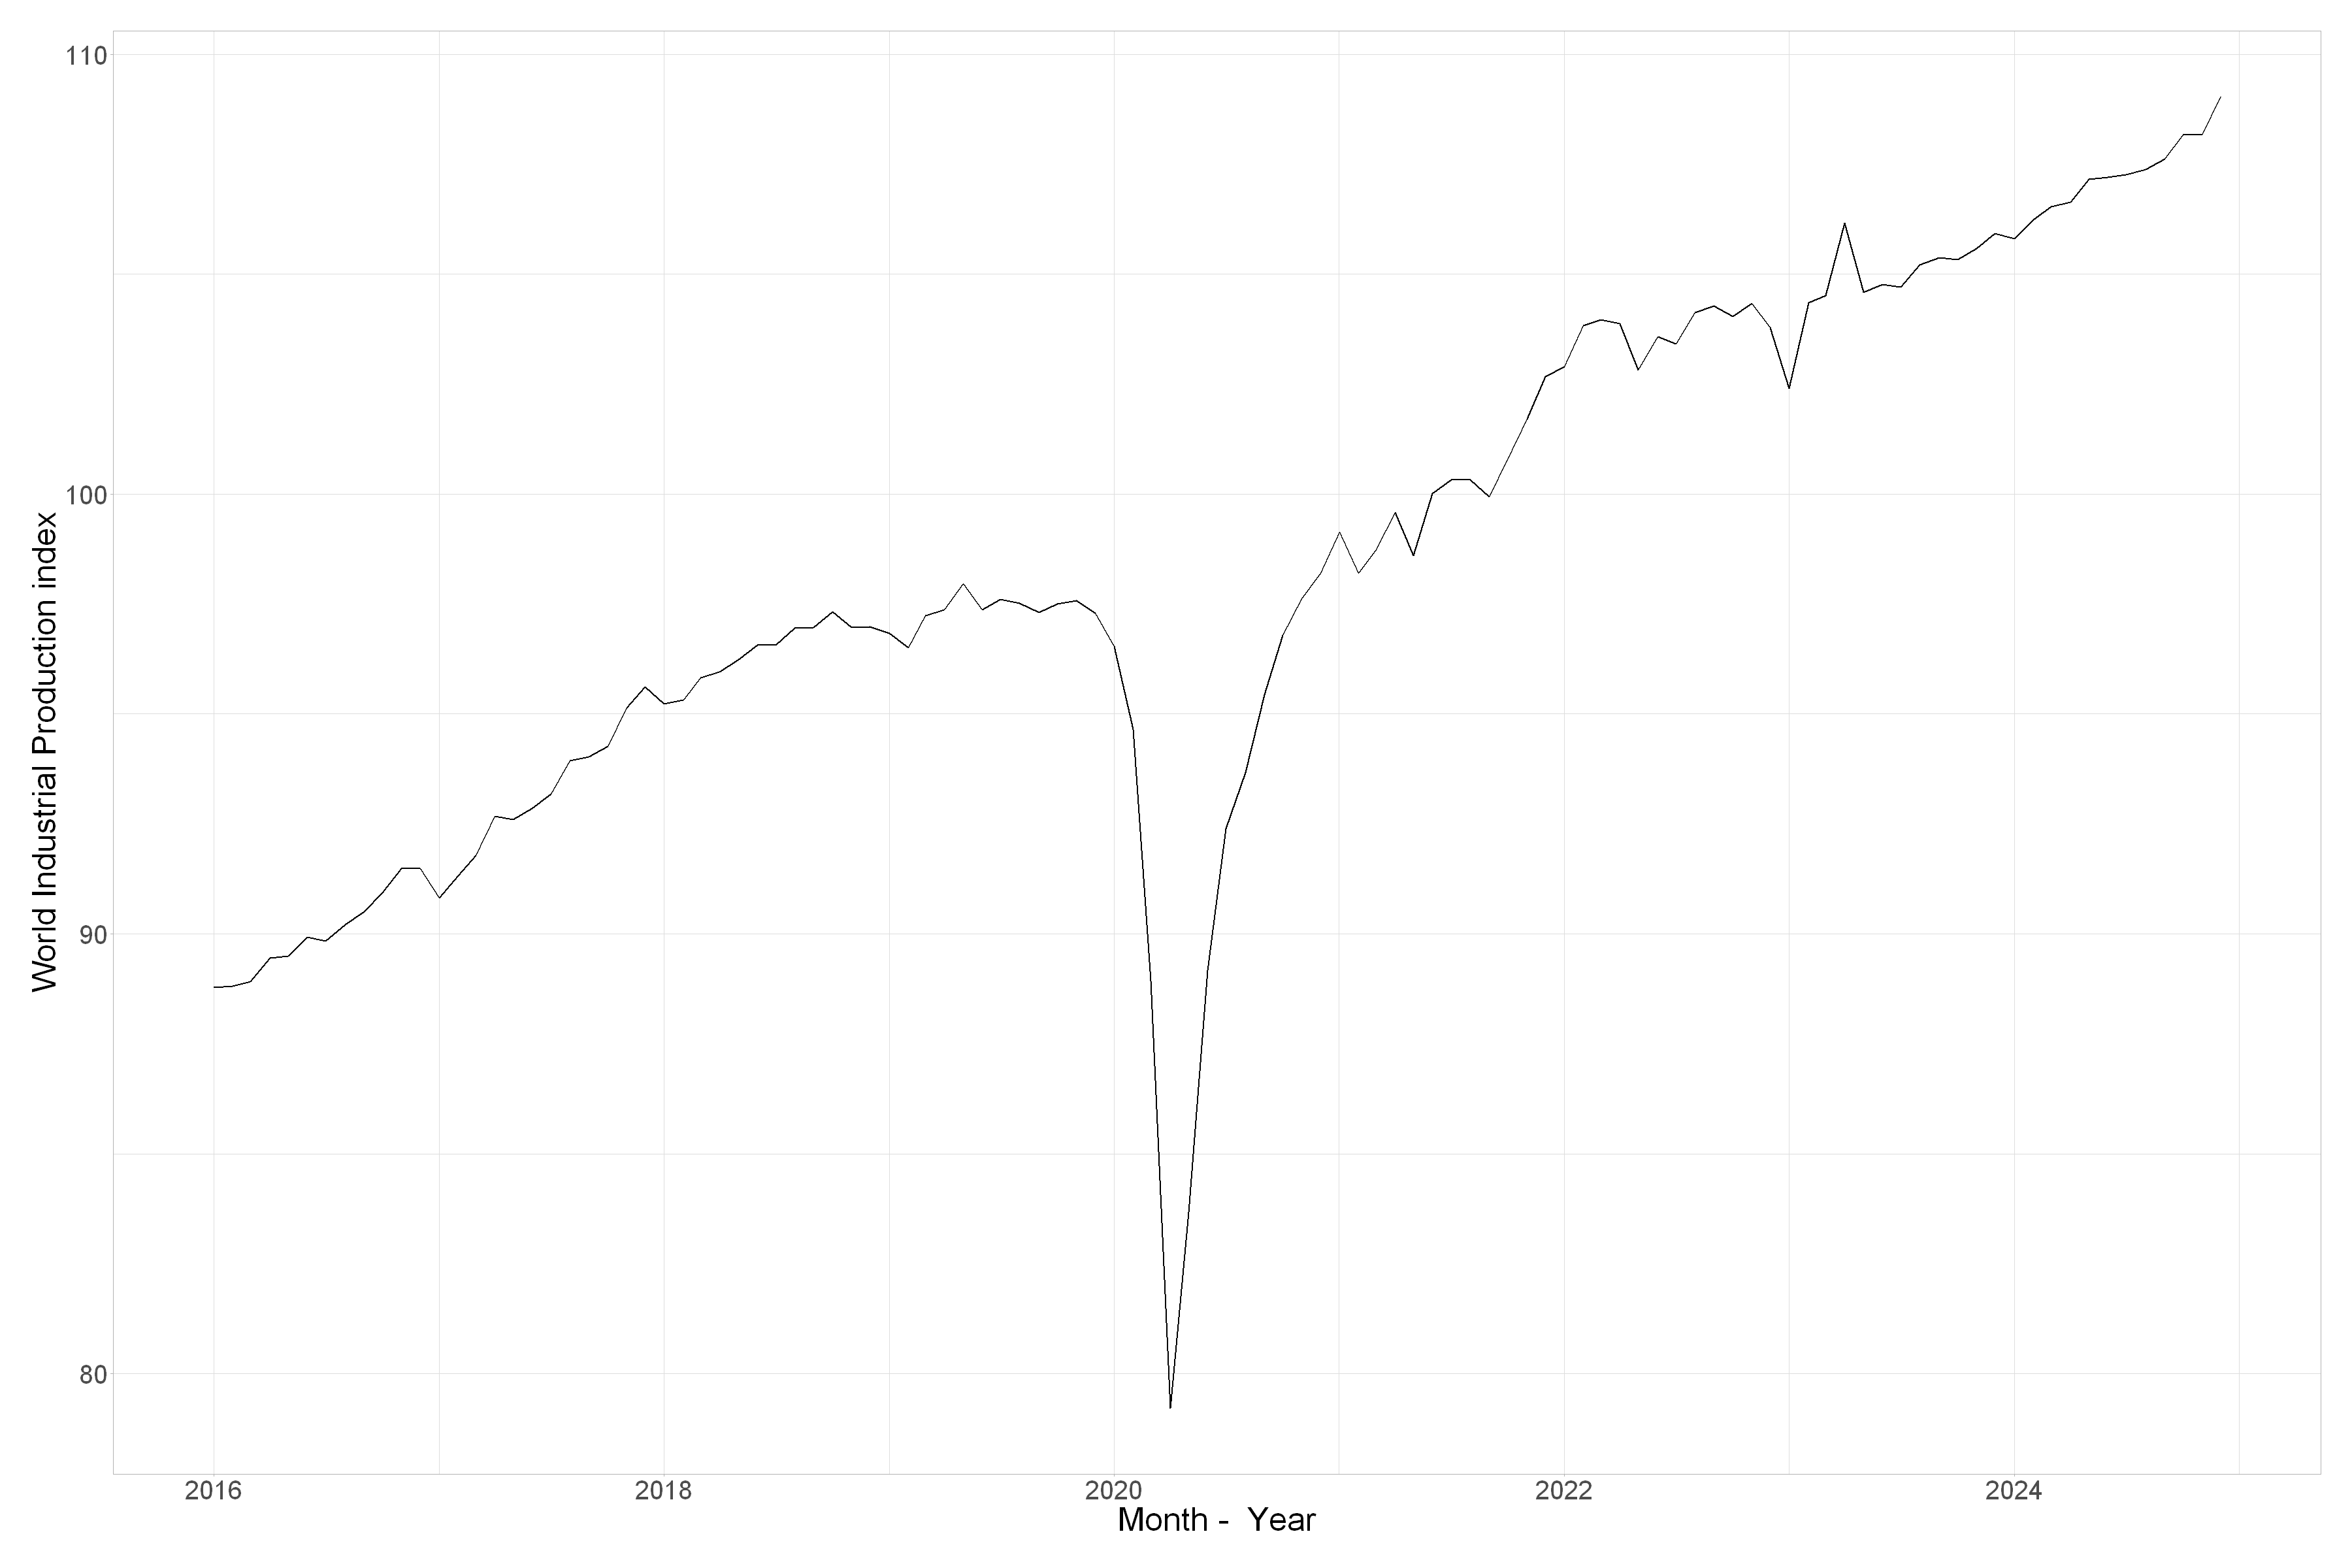

In [17]:
options(repr.plot.width=30, repr.plot.height=20)

fig = autoplot(WIP, size = .8, colour = 'black')
fig = fig +
theme_light() +
theme(plot.margin = ggplot2::margin(1, 1, 1, 1, "cm")) +
theme(text=element_text(size=30)) +
labs(x = "Month -  Year") +
labs(y = "World Industrial Production index")
fig

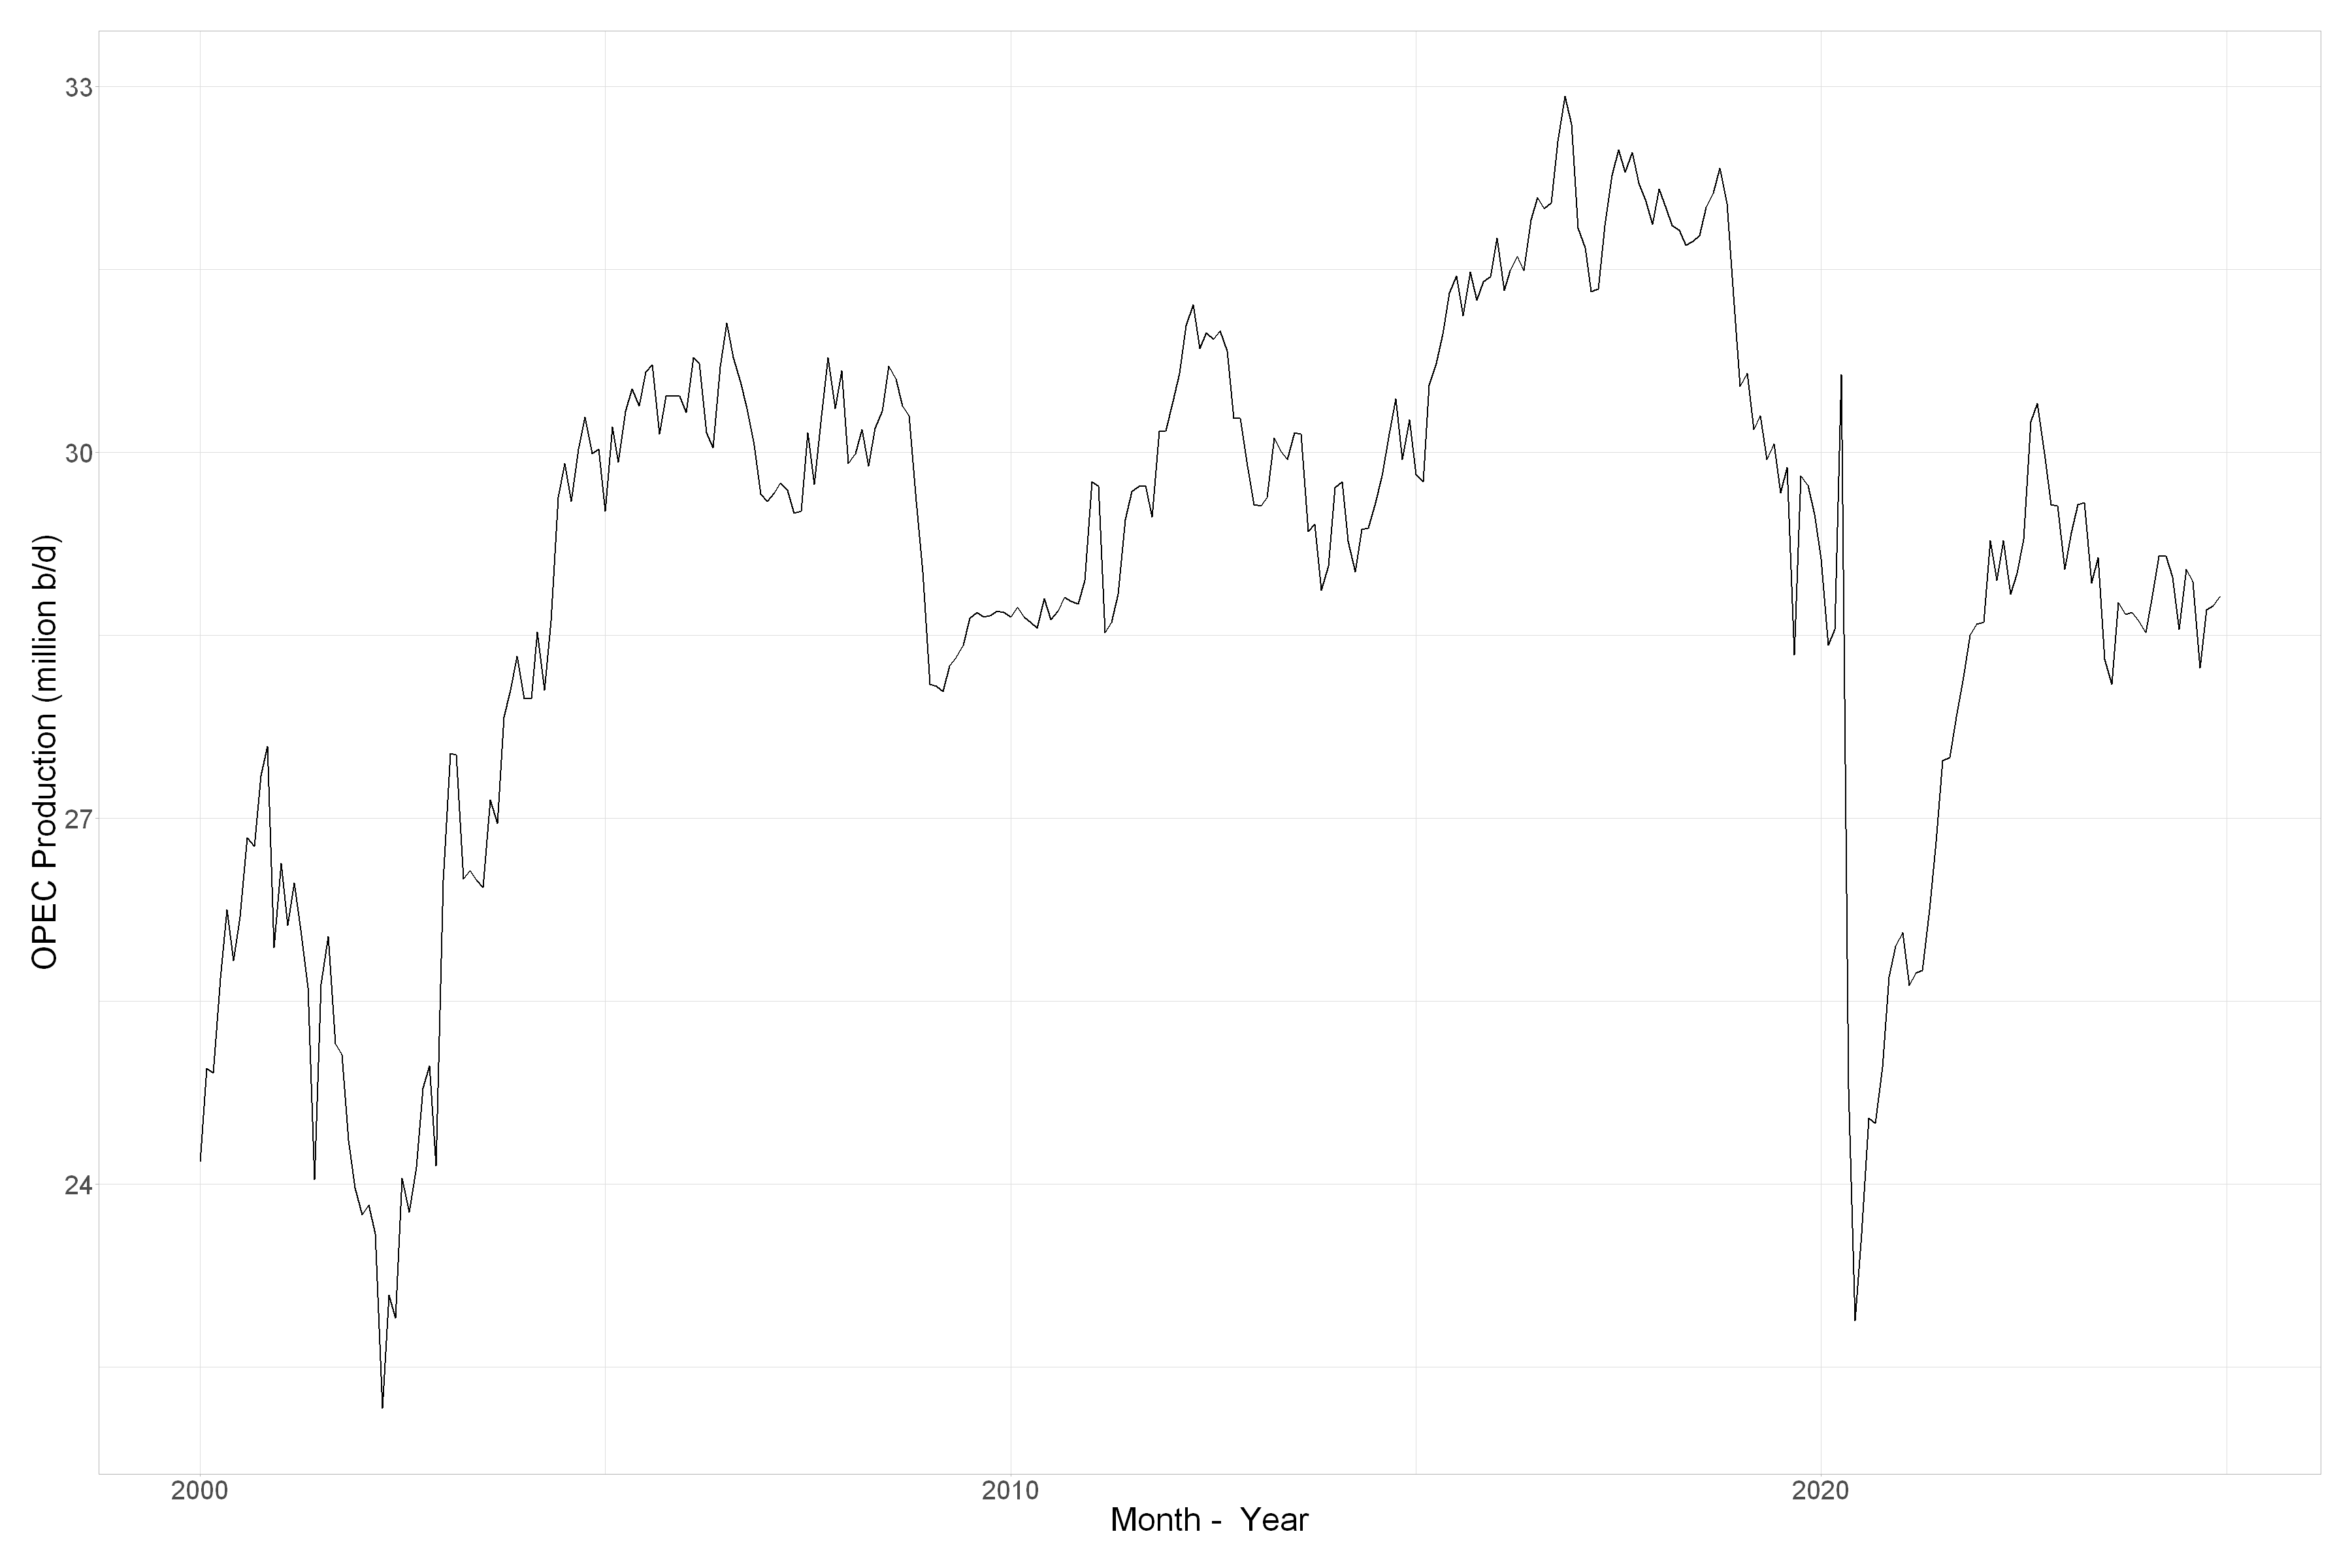

In [18]:
options(repr.plot.width=30, repr.plot.height=20)

fig = autoplot(OPEC, size = .8, colour = 'black')
fig = fig +
theme_light() +
theme(plot.margin = ggplot2::margin(1, 1, 1, 1, "cm")) +
theme(text=element_text(size=30)) +
labs(x = "Month -  Year") +
labs(y = "OPEC Production (million b/d)")
fig

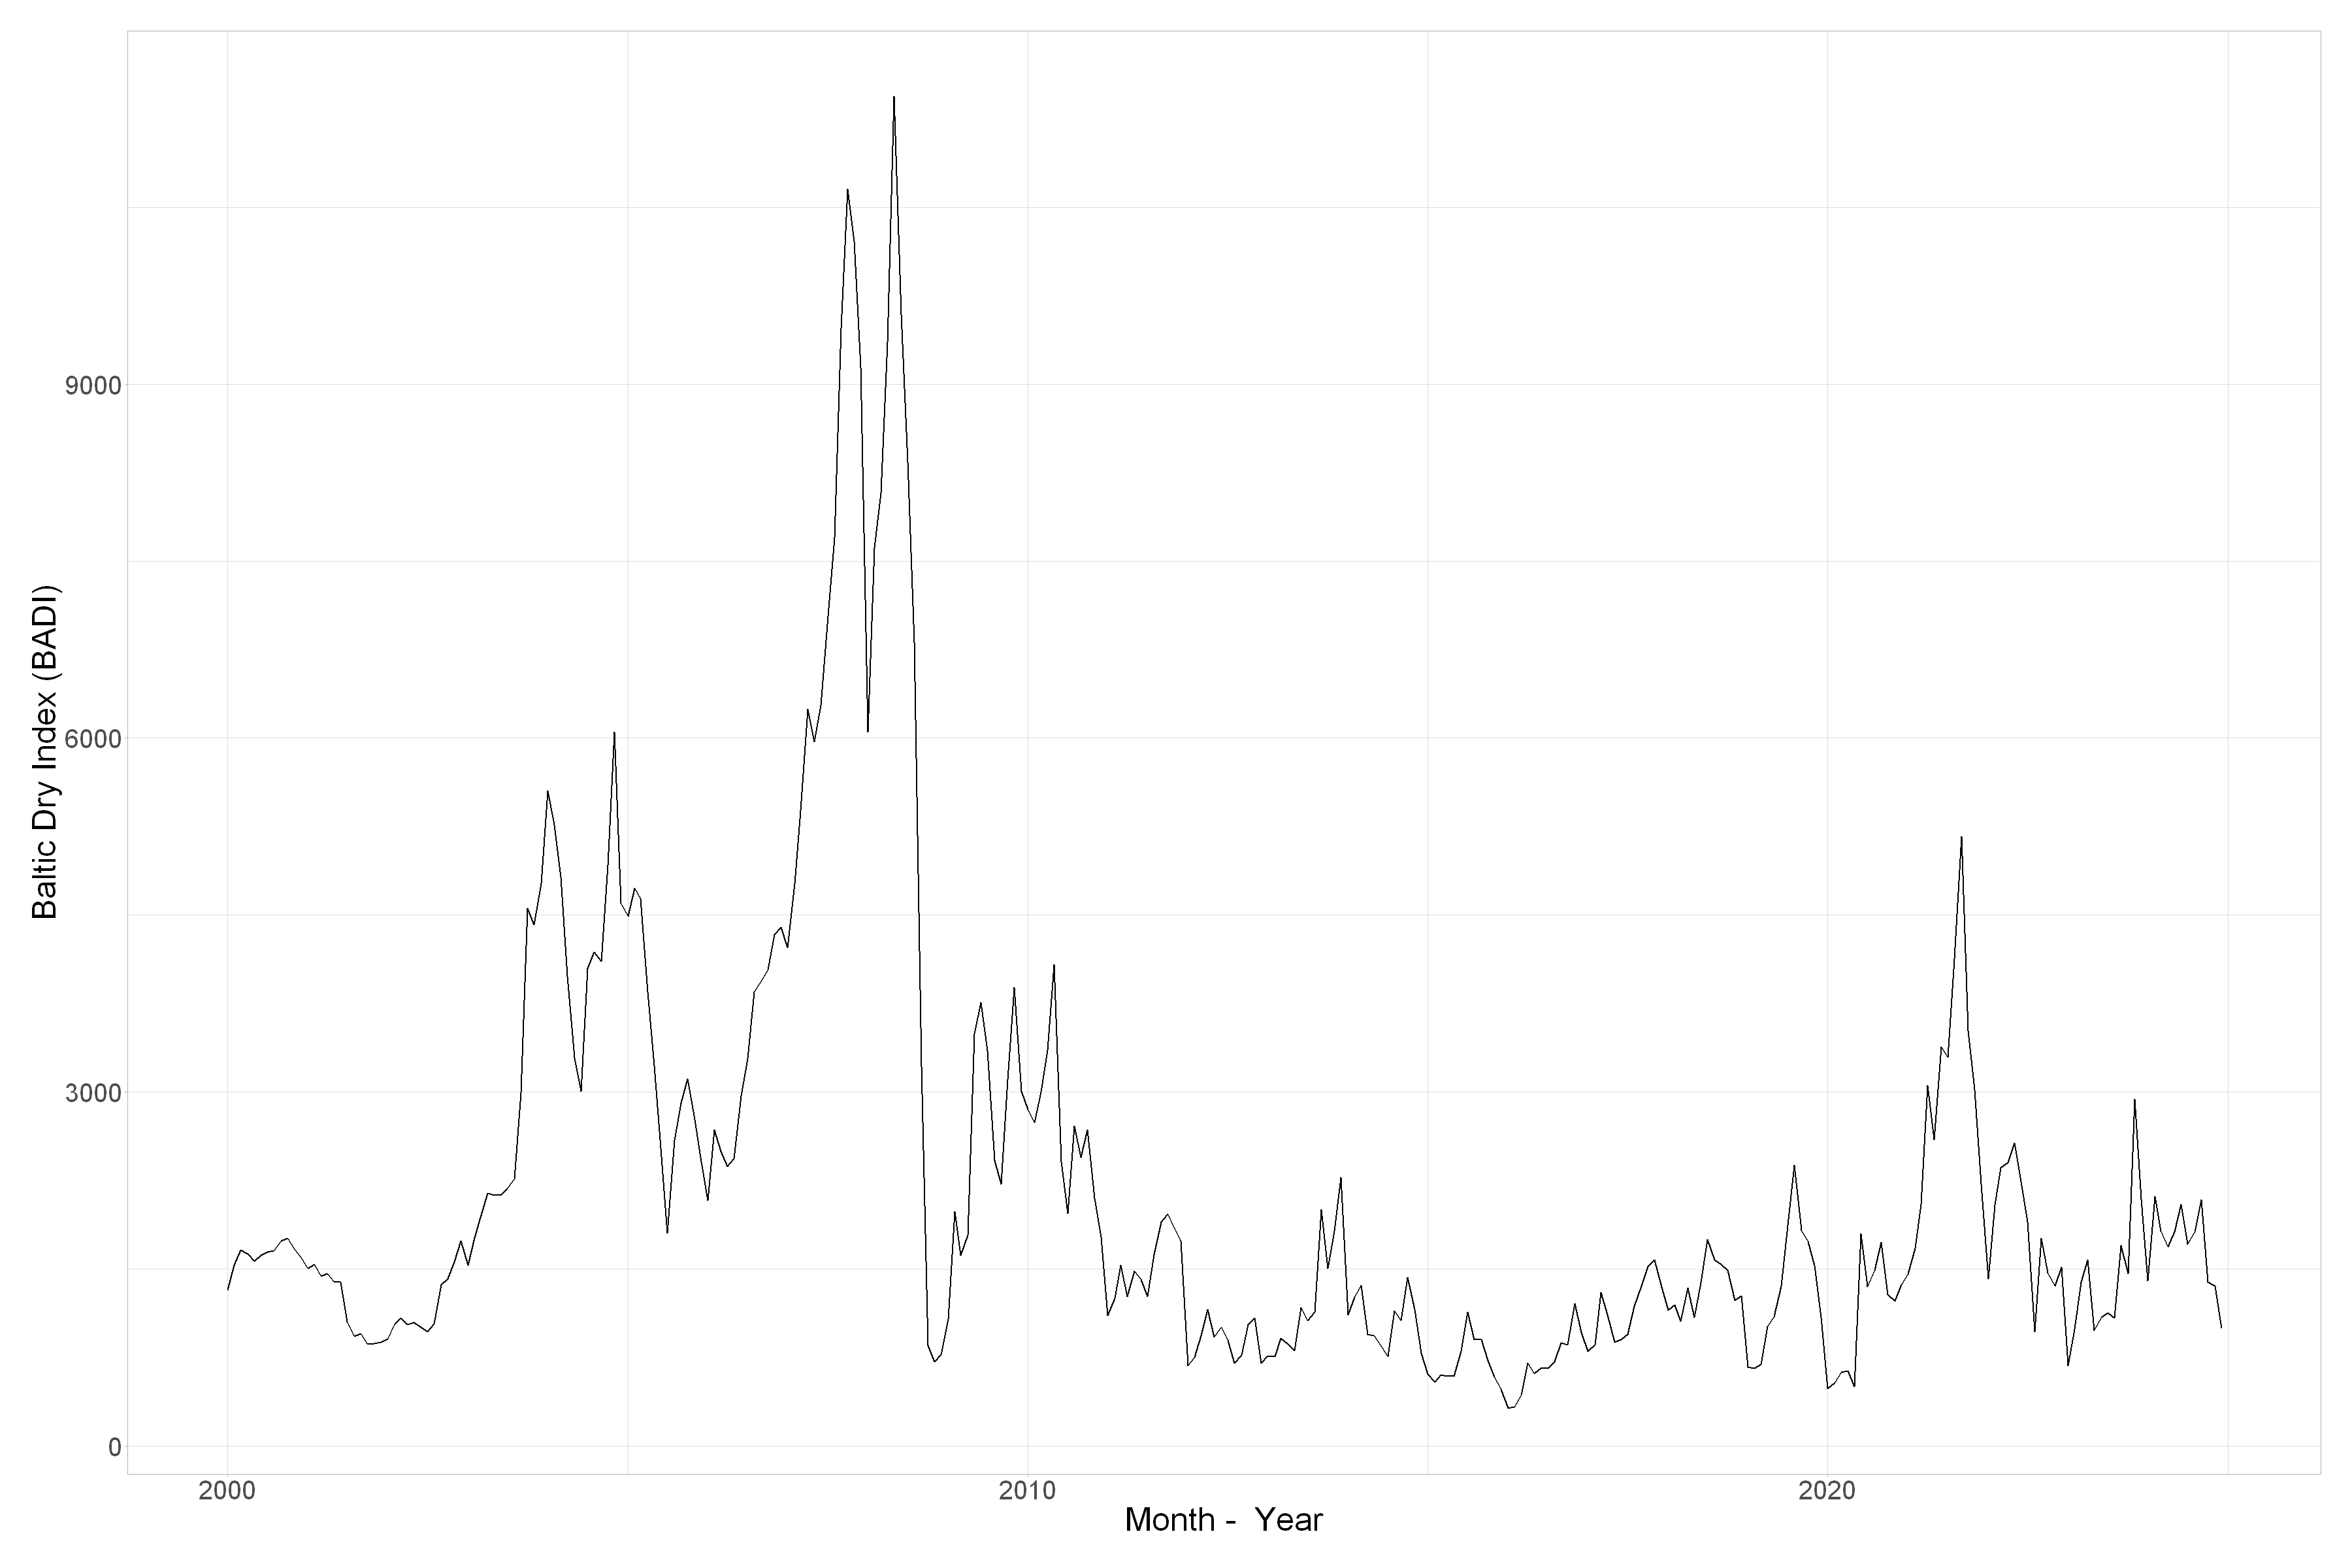

In [19]:
options(repr.plot.width=30, repr.plot.height=20)

fig = autoplot(BDI, size = .8, colour = 'black')
fig = fig +
theme_light() +
theme(plot.margin = ggplot2::margin(1, 1, 1, 1, "cm")) +
theme(text=element_text(size=30)) +
labs(x = "Month -  Year") +
labs(y = "Baltic Dry Index (BADI)")
fig

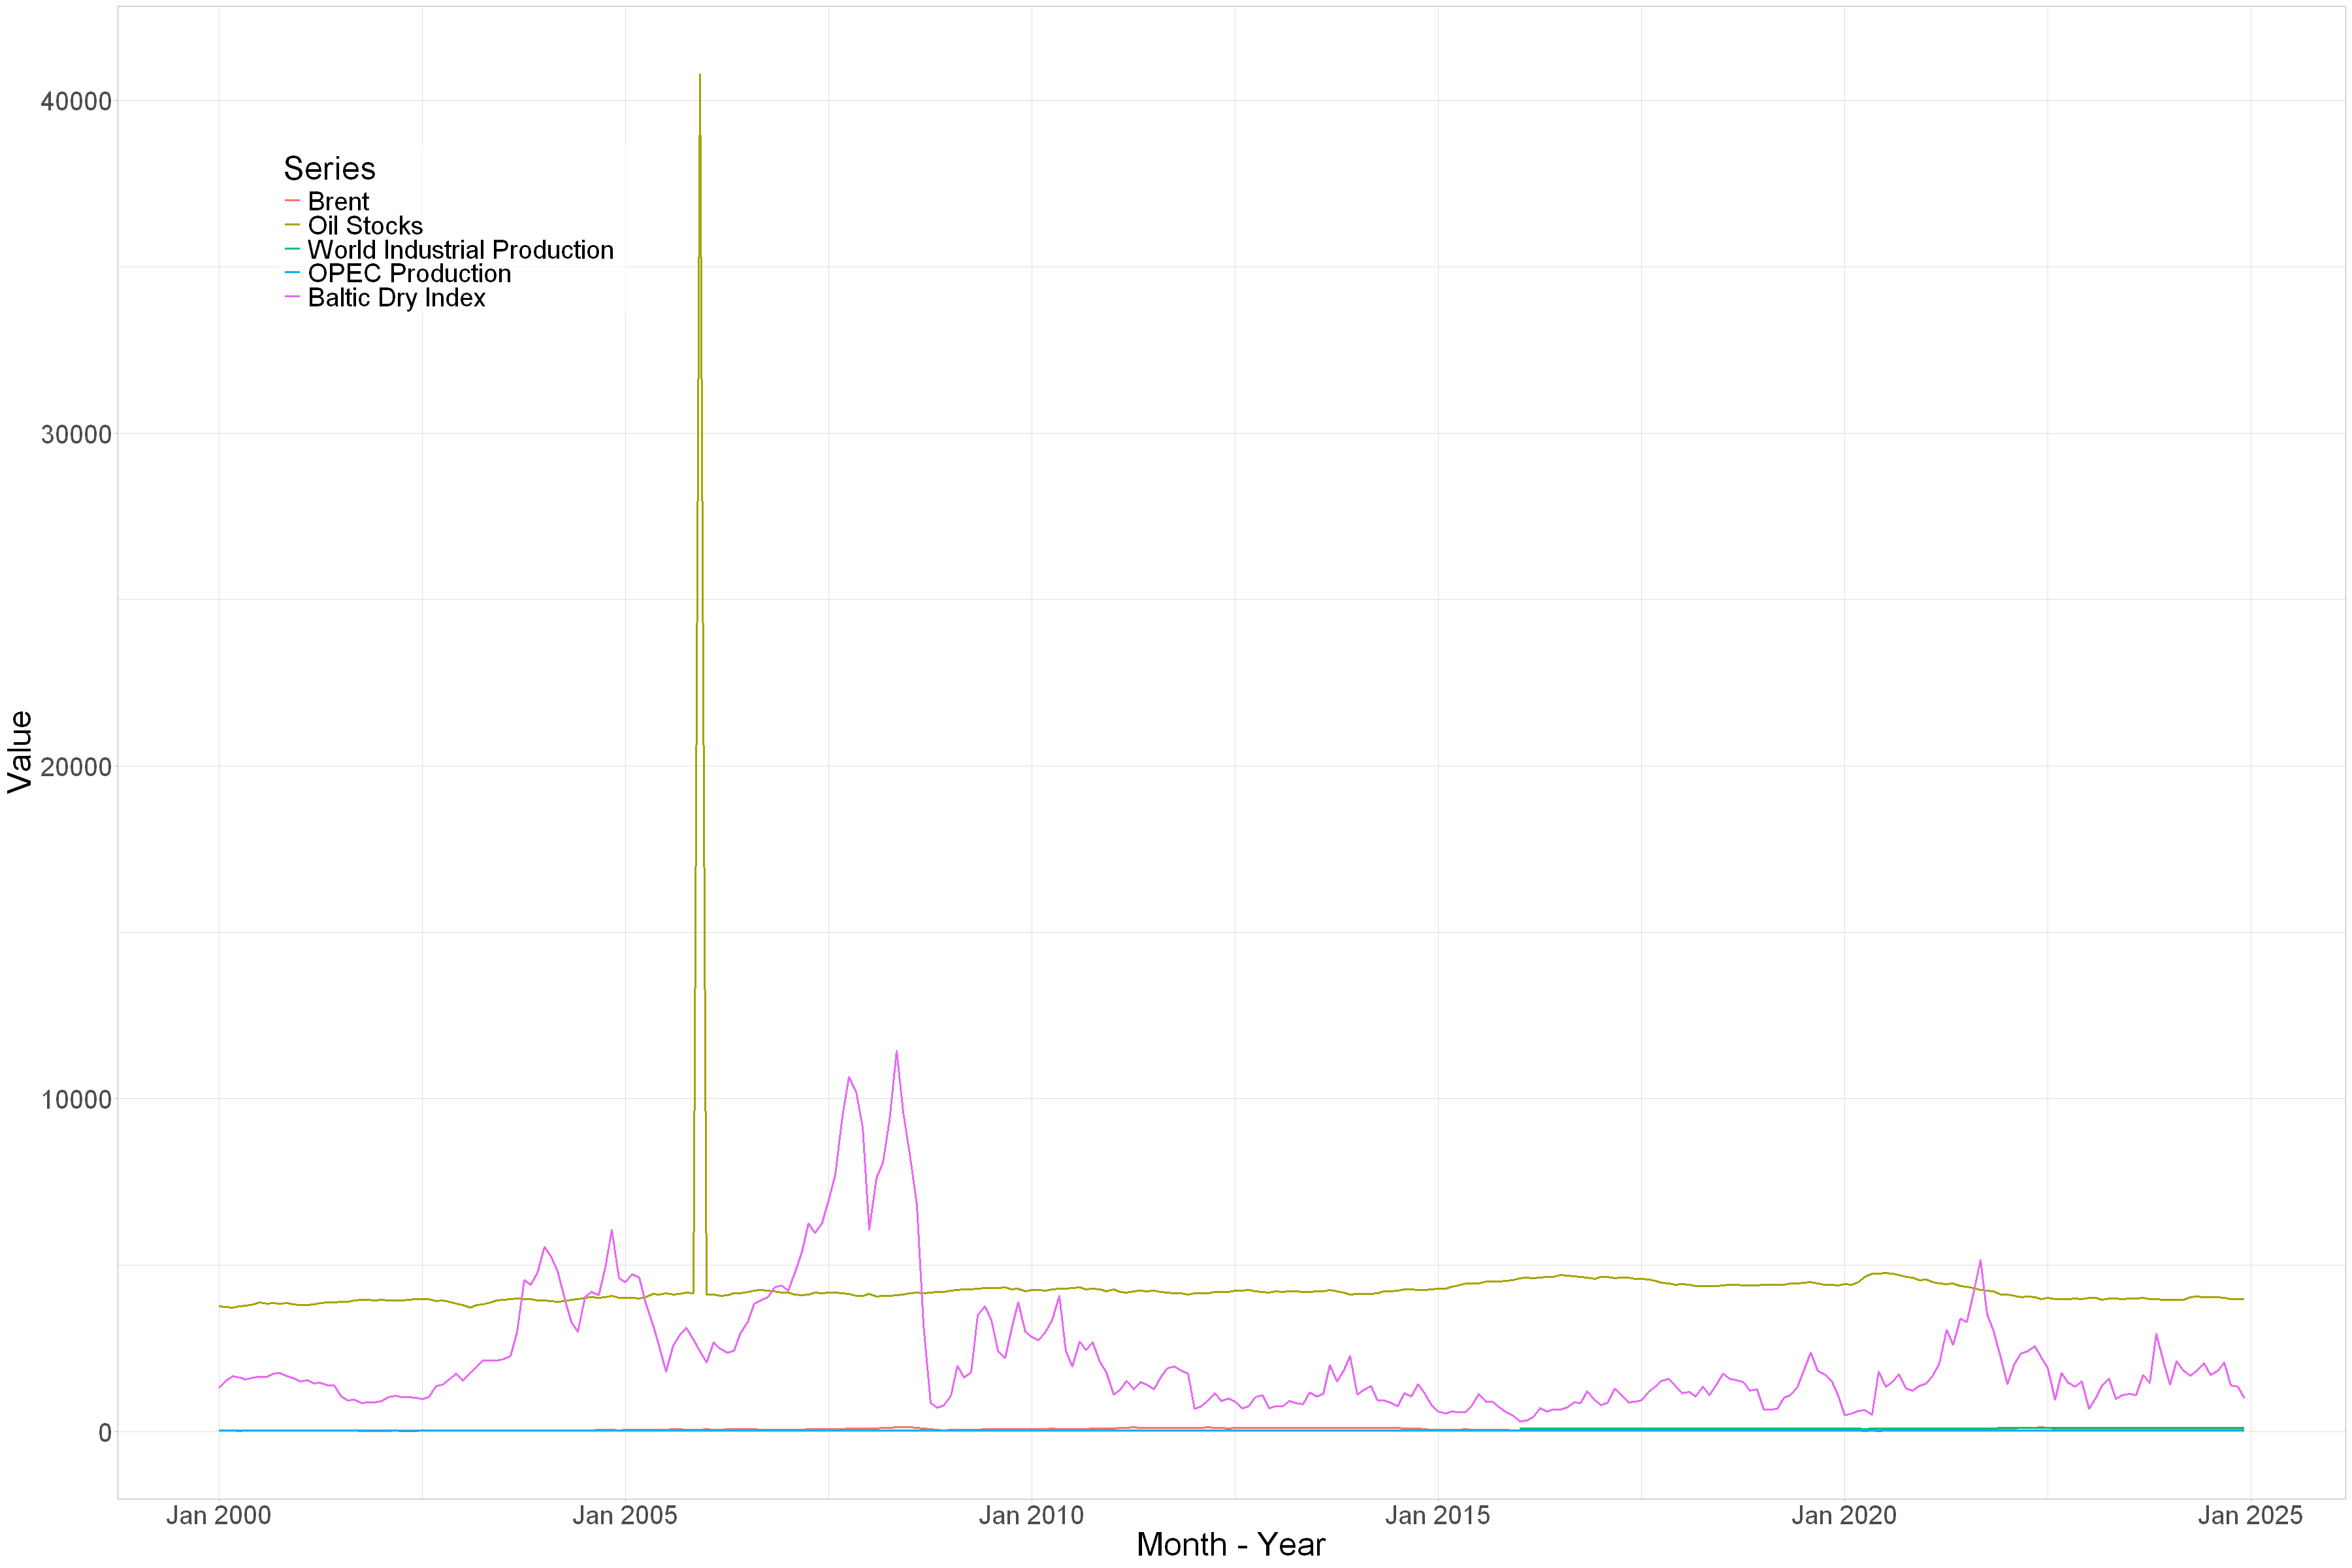

In [20]:
all_series <- merge(Brent, Oil_Stocks, WIP, OPEC, BDI)
colnames(all_series) <- c("Brent", "Oil Stocks", "World Industrial Production", "OPEC Production", "Baltic Dry Index")

df_long <- fortify(all_series, melt = TRUE)
colnames(df_long) <- c("Date", "Series", "Value")

options(repr.plot.width = 30, repr.plot.height = 20)

fig <- ggplot(df_long, aes(x = Date, y = Value, colour = Series)) +
  geom_line(size = 1) +
  theme_light() +
  theme(
    # aspect.ratio = 1,
    plot.margin = ggplot2::margin(0.2, 0.2, 0.2, 0.2, "cm"),
    text = element_text(size = 30),
    legend.position = c(0.15, 0.85),
    legend.background = element_rect(fill = alpha("white", 0.6)),
    legend.key = element_rect(fill = NA)
  ) +
  labs(
    x = "Month - Year",
    y = "Value",
    colour = "Series"
  )

fig


# Stationarity

In [21]:
summary(ur.df(Brent, type='trend', lags=30, selectlags="AIC"))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-21.8417  -3.9894   0.6469   3.7461  17.4151 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.902228   1.170712   2.479  0.01380 *  
z.lag.1     -0.041953   0.014119  -2.971  0.00324 ** 
tt           0.001226   0.004833   0.254  0.80003    
z.diff.lag   0.334422   0.057681   5.798 1.91e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.948 on 265 degrees of freedom
Multiple R-squared:  0.1304,	Adjusted R-squared:  0.1206 
F-statistic: 13.25 on 3 and 265 DF,  p-value: 4.395e-08


Value of test-statistic is: -2.9714 3.0686 4.5485 

Critical values for test statistics: 
      1pct  5pct 10pct
tau3 -3.98 -3.42 -3.13
p

We cannot reject the null hypothesis that the constant and deterministic trend are jointly zero because $\varphi_2=3.07<4.71$.

optional: (We also cannot reject that the deterministic trend is zero because $\varphi_3=4.55<6.30$.)

Therefore we re-run the ADF test with specification = "none" (no constant, no determistic trend).

In [22]:
summary(ur.df(Brent, type='none', lags=30, selectlags="AIC"))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-20.894  -3.198   1.357   4.168  17.064 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
z.lag.1    -0.003547   0.004836  -0.733    0.464    
z.diff.lag  0.320206   0.058071   5.514 8.27e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.022 on 267 degrees of freedom
Multiple R-squared:  0.1027,	Adjusted R-squared:  0.09599 
F-statistic: 15.28 on 2 and 267 DF,  p-value: 5.204e-07


Value of test-statistic is: -0.7334 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


We cannot reject the null that there exists a unit root at the 5pct significance level since $\tau_1=-0.7334>-1.095"$.

Therefore we difference the series. Chatgpt why we also take the log:

We log the Brent crude oil price series because crude oil prices exhibit strong multiplicative volatility: they move in percentages rather than fixed amounts, and large level increases create proportionally larger fluctuations. Taking the logarithm stabilizes the variance, making the series more homoskedastic and better aligned with the linear assumptions of ARIMA and ADL models. Log-transforming also converts differences into approximate percentage changes, so the series becomes interpretable as monthly returns, which are typically stationary even when price levels are not. This improves model performance, reduces the influence of extreme outliers, and produces more reliable forecasts compared with using raw price levels.


1. Oil prices are strictly positive and highly volatile → logs stabilize variance

Brent has:

multiplicative shocks (prices jump by percentages, not by fixed amounts)

strong heteroskedasticity

explosive episodes (2008, COVID crash, 2022 spike)

Taking logs makes the series behave more like a linear, additive process, which is exactly what ARIMA/ADL/VAR models assume.

Without logging:

large spikes dominate the model

residuals become heteroskedastic

parameters can be unstable

forecasts become scale-dependent

This is all bad.

In [23]:
Brent_log <- log(Brent)
dBrent_log = diff(Brent_log)

# diff() always produces an NA in the first observation (there is no lagged value for t=1).
dBrent_log  <- na.omit(dBrent_log)

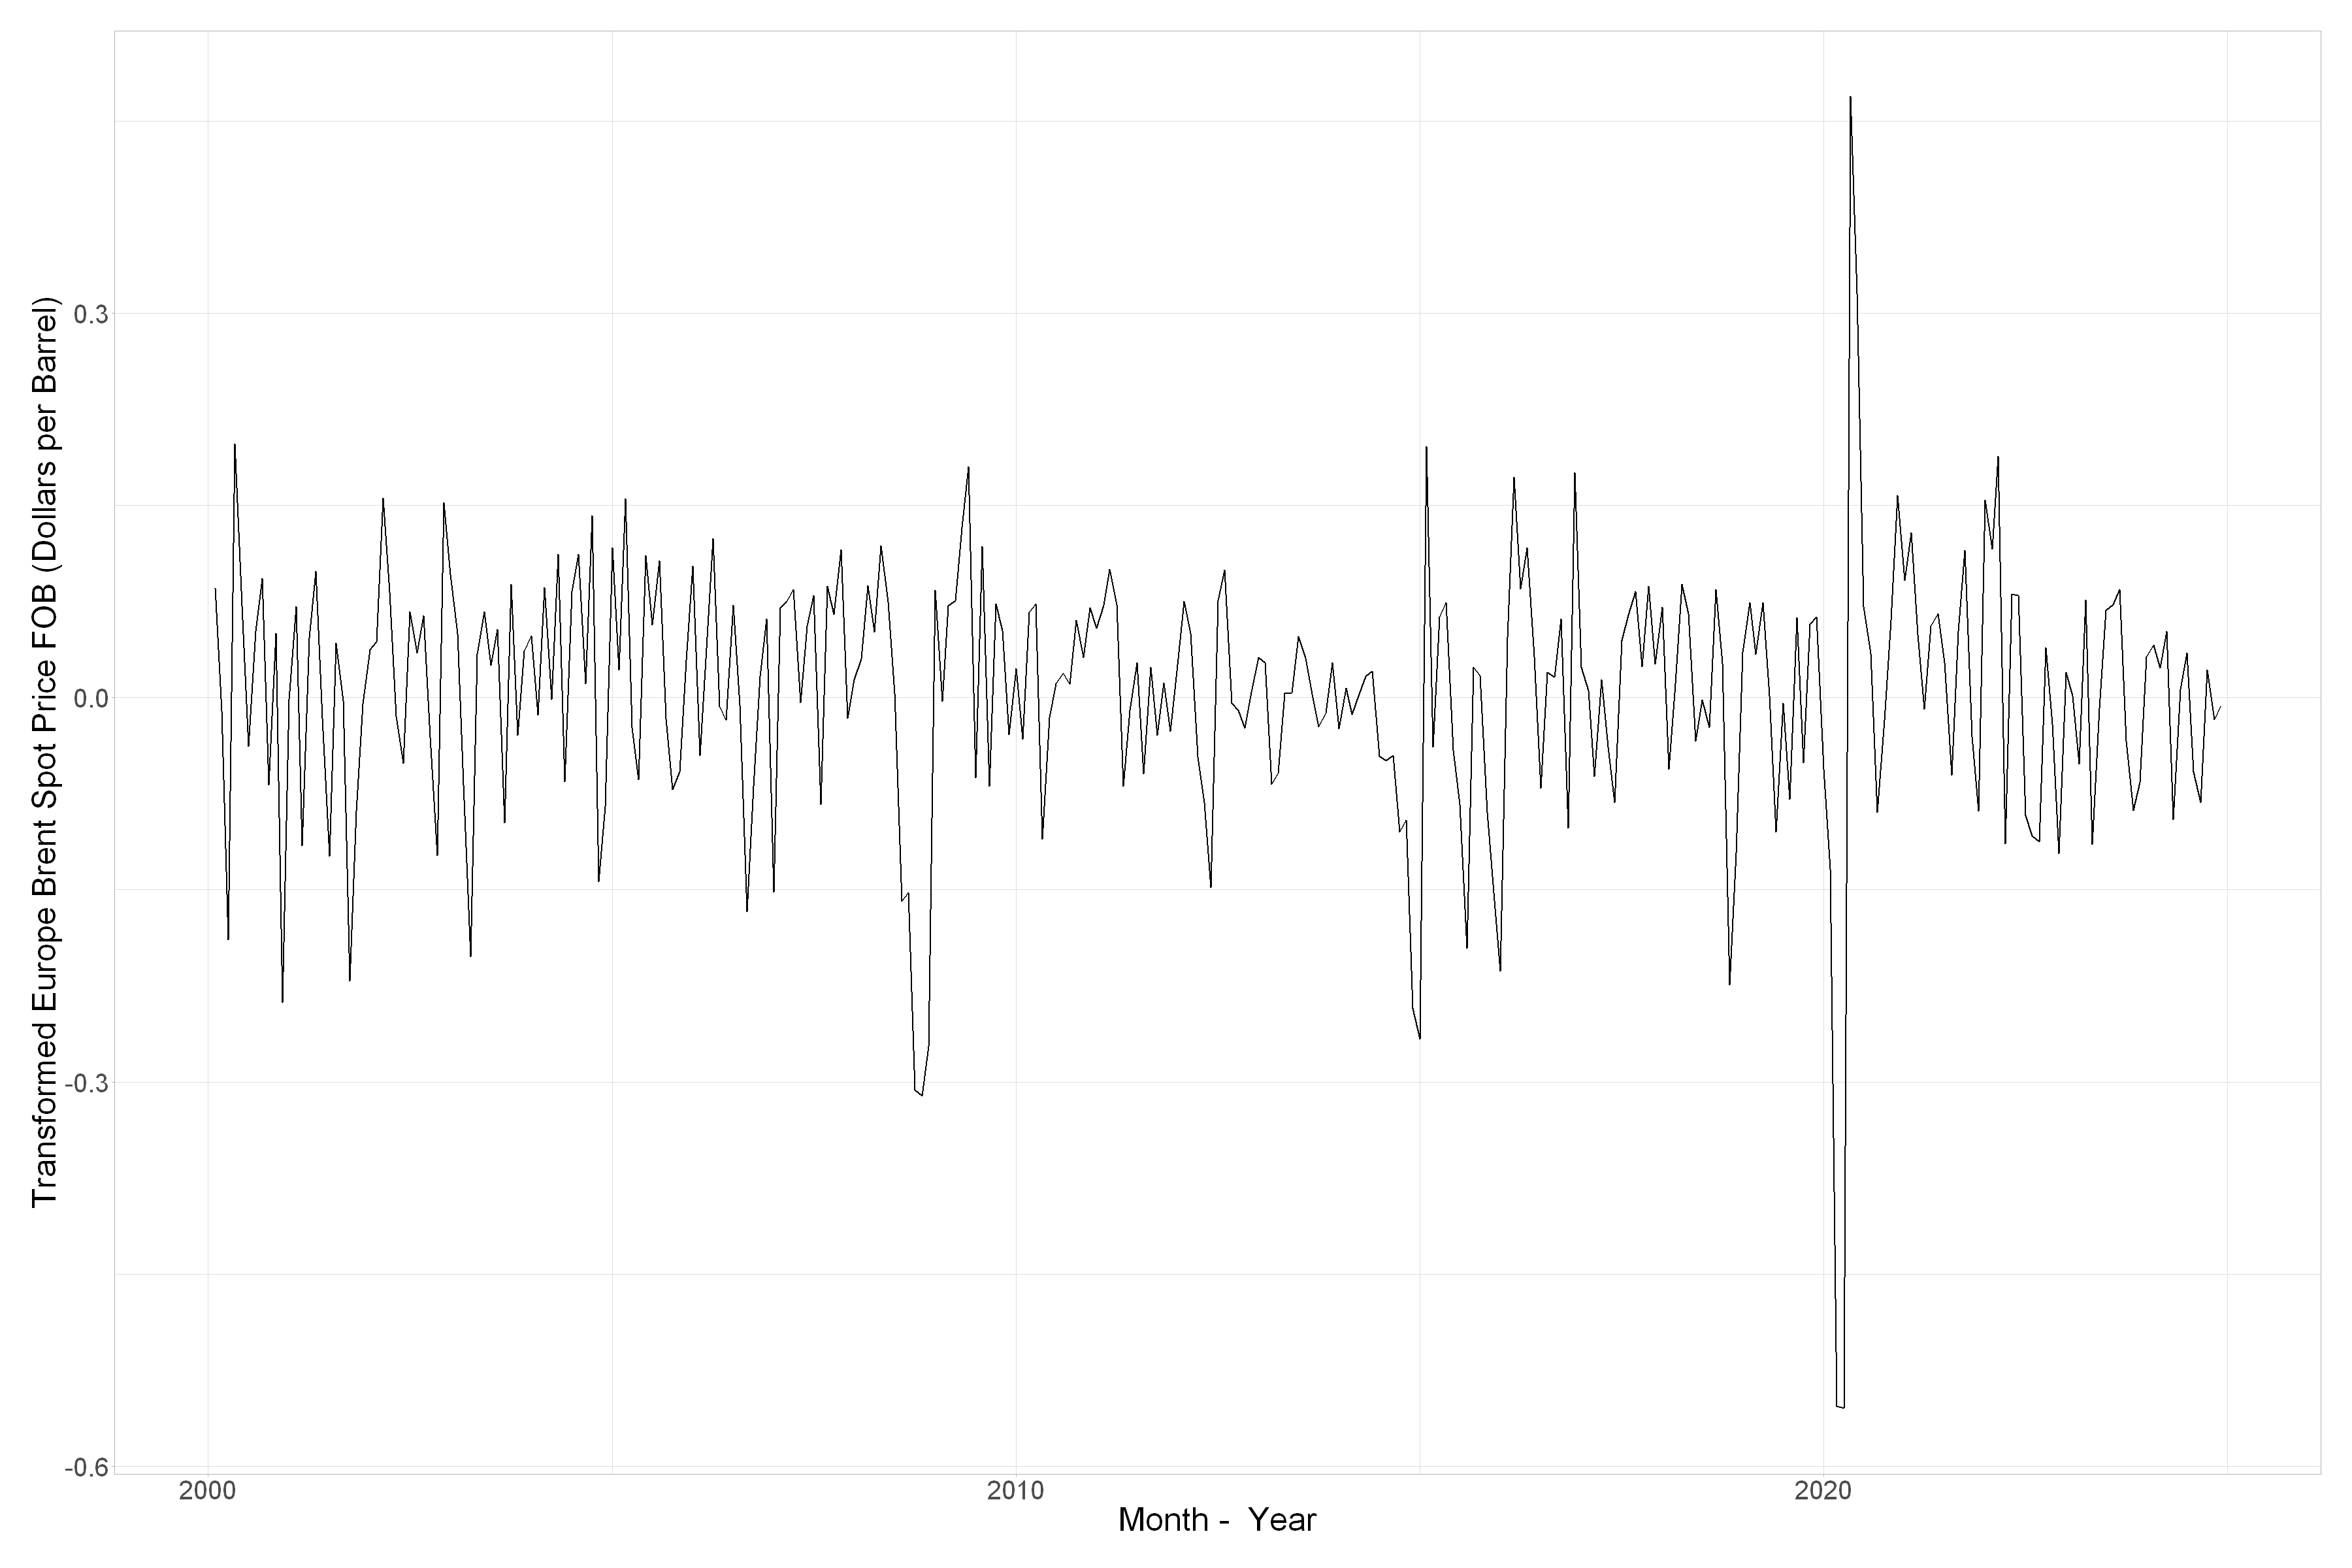

In [24]:
options(repr.plot.width=30, repr.plot.height=20)

fig = autoplot(dBrent_log, size = .8, colour = 'black')
fig = fig +
theme_light() +
theme(plot.margin = ggplot2::margin(1, 1, 1, 1, "cm")) +
theme(text=element_text(size=30)) +
labs(x = "Month -  Year") +
labs(y = "Transformed Europe Brent Spot Price FOB (Dollars per Barrel)")
fig

In [25]:
summary(ur.df(dBrent_log, type='none', lags=30, selectlags="AIC"))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.49795 -0.05073  0.01671  0.06067  0.54964 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
z.lag.1     -0.96292    0.13098  -7.352  2.5e-12 ***
z.diff.lag1  0.26852    0.11993   2.239   0.0260 *  
z.diff.lag2  0.13147    0.10510   1.251   0.2121    
z.diff.lag3  0.08946    0.09048   0.989   0.3237    
z.diff.lag4 -0.01551    0.07460  -0.208   0.8355    
z.diff.lag5  0.11071    0.06115   1.810   0.0714 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.0995 on 262 degrees of freedom
Multiple R-squared:  0.3991,	Adjusted R-squared:  0.3854 
F-statistic: 29.01 on 6 and 262 DF,  p-value: < 2.2e-16


Value of test-statistic is: -7.3519 

Cri

We reject the null of a unit root, meaning that the series is stationary. I.e. there is enough evidence to conclude that the series is stationary because $\tau_1=-7.35<-1.95$. 

# ARIMA Subset Search with AIC/BIC

In [26]:
p = 4       # Maximum AR order
q = 4       # Maximum MA order
pq = (p+1) * (q+1)   # Total number of (p,q) combinations including 0
resAIC = rep(0, pq)  # Storage for AIC values
resBIC = rep(0, pq)  # Storage for BIC values
pdf = rep(0, pq)     # Storage for AR order (p)
qdf = rep(0, pq)     # Storage for MA order (q)

# if we condisider subarima models, where coefficients can be or not be, then we jump to 2^(p+q) models. but this function does not consider this. the next section does.

k = 0  # Counter for results
for (i in 0:p) {
    for (j in 0:q) {
        k = k + 1
        # Estimate ARMA(p,q) model for stationary series dy
        model = arima(dBrent_log, order = c(i,0,j), include.mean = FALSE)
        
        # Store information criteria
        resAIC[k] = AIC(model)
        resBIC[k] = BIC(model)
        
        # Store corresponding lag orders
        pdf[k] = i
        qdf[k] = j
    }
}

# Combine and display results: p, q, AIC, and BIC
results = cbind(pdf, qdf, data.frame(resAIC), data.frame(resBIC))
results 

# Find the model with the lowest AIC
bestAIC = results[which.min(results$resAIC), ]   # Row with min AIC

# Find the model with the lowest BIC
bestBIC = results[which.min(results$resBIC), ]   # Row with min BIC

# Display them
print("According to the AIC information criterion, the best model is")
bestAIC

print("According to the BIC information criterion, the best model is")
bestBIC

pdf,qdf,resAIC,resBIC
<dbl>,<dbl>,<dbl>,<dbl>
0,0,-501.7018,-498.0013
0,1,-520.8478,-513.4469
0,2,-520.4051,-509.3038
0,3,-518.5640,-503.7622
0,4,-521.7599,-503.2576
1,0,-516.5980,-509.1971
1,1,-520.5651,-509.4637
1,2,-521.0218,-506.2201
1,3,-519.1545,-500.6523


[1] "According to the AIC information criterion, the best model is"


,pdf,qdf,resAIC,resBIC
,<dbl>,<dbl>,<dbl>,<dbl>
23,4,2,-531.5167,-505.6136


[1] "According to the BIC information criterion, the best model is"


,pdf,qdf,resAIC,resBIC
,<dbl>,<dbl>,<dbl>,<dbl>
2,0,1,-520.8478,-513.4469


In [27]:
fit_uni <- auto.arima(dBrent_log, 
    max.d = 0,    # no differencing allowed (series already made stationary)
    max.p = 4,    # maximum AR order (p)
    max.q = 4,    # maximum MA order (q)
    max.D = 0,    # no seasonal differencing
    max.P = 0,    # no seasonal AR terms
    max.Q = 0,    # no seasonal MA terms
    ic = "aic",   # choose the model that minimizes AIC
    stepwise = FALSE,     # search over all models (not just stepwise path)
    approximation = FALSE # use exact maximum likelihood (slower but more accurate)
)
summary(fit_uni)

Series: dBrent_log 
ARIMA(0,0,4) with zero mean 

Coefficients:
         ma1      ma2      ma3      ma4
      0.2754  -0.0875  -0.0653  -0.1317
s.e.  0.0579   0.0591   0.0631   0.0576

sigma^2 = 0.01002:  log likelihood = 265.88
AIC=-521.76   AICc=-521.56   BIC=-503.26

Training set error measures:
                      ME       RMSE        MAE      MPE    MAPE     MASE
Training set 0.003633379 0.09941295 0.07207996 94.73877 169.993 0.692788
                     ACF1
Training set -0.005245346

We evaluated autoregressive moving average (ARMA) models with up to 4 lags in both the autoregressive and moving average terms. This meant that a total of 25 models (all combinations of p = 0,…,4 and q = 0,…,4) were estimated. The choice of 4 lags reflects a balance between allowing enough dynamics to capture quarterly fluctuations in GDP and keeping the model space manageable for interpretation.
 
The models were compared using the Akaike Information Criterion (AIC), and the search considered all possible specifications within this range (an exact search rather than a stepwise approximation). Likelihood estimation was carried out without approximation. Based on this procedure, the ARMA(0,0) model, which corresponds to white noise, was selected as the best fitting model.


INCLUDE THIS:

An exhaustive ARMA(p,q) search with AIC favored a higher-order ARMA(4,2) model, which is common when using AIC because its penalty for additional parameters is relatively mild; however, auto.arima, which uses AICc and enforces stationarity/invertibility constraints, selected a more parsimonious ARMA(0,4) model. We therefore use the auto.arima model as the benchmark, consistent with forecasting practice and the course methodology.

Finally, we decided to let auto.arima find the best model without restrictions so we ran:

In [28]:
fit_uni <- auto.arima(dBrent_log, 
    max.d = 0,    # no differencing allowed (series already made stationary)
    # max.p = 4,    # maximum AR order (p)
    # max.q = 4,    # maximum MA order (q)
    # max.D = 0,    # no seasonal differencing
    # max.P = 0,    # no seasonal AR terms
    # max.Q = 0,    # no seasonal MA terms
    ic = "aic",   # choose the model that minimizes AIC
    stepwise = FALSE,     # search over all models (not just stepwise path)
    approximation = FALSE # use exact maximum likelihood (slower but more accurate)
)
summary(fit_uni)

Series: dBrent_log 
ARIMA(0,0,4) with zero mean 

Coefficients:
         ma1      ma2      ma3      ma4
      0.2754  -0.0875  -0.0653  -0.1317
s.e.  0.0579   0.0591   0.0631   0.0576

sigma^2 = 0.01002:  log likelihood = 265.88
AIC=-521.76   AICc=-521.56   BIC=-503.26

Training set error measures:
                      ME       RMSE        MAE      MPE    MAPE     MASE
Training set 0.003633379 0.09941295 0.07207996 94.73877 169.993 0.692788
                     ACF1
Training set -0.005245346

### Interpretation of the Univariate Benchmark Model

<!-- We estimate the univariate benchmark model on the **log-differenced Brent crude oil price series**,  
defined as:

$$ dBrent\_{log,t} = \Delta \log(Brent_t). $$

Since Brent levels were found to be non-stationary, taking logs and first differences produces a
near-stationary series suitable for ARIMA modelling.

Running `auto.arima(dBrent_log)` yields:

$$ ARIMA(2,0,0)(1,0,0)_{12}, $$

which corresponds to an **AR(2)** process for monthly log returns with a very small seasonal AR(1)
component at lag 12. This means the underlying (non-seasonal) model is:

$$ dBrent\_{log,t} = \phi_1 dBrent\_{log,t-1} + \phi_2 dBrent\_{log,t-2} + \Phi_1 dBrent\_{log,t-12} + \varepsilon_t. $$

The coefficient estimates indicate:

- mild short-run momentum ($\phi_1 > 0$),
- mild mean reversion ($\phi_2 < 0$),
- negligible annual seasonality ($\Phi_1 \approx 0$).

Residual diagnostics show:

- **ACF1 ≈ 0**, meaning no remaining autocorrelation,
- **RMSE ≈ 0.10**, indicating roughly 10% monthly volatility in log returns,
- low AIC/BIC values, suggesting a good in-sample fit.

Because the model is estimated on a differenced log series ($d = 0$ in differences of log-returns),
this specification corresponds to an:

$$ ARIMA(2,1,0)(1,1,0)_{12} $$

model for the **log Brent price level**. -->



Using exact maximum likelihood (`approximation = FALSE`), `auto.arima` selects an
$$ \text{ARIMA}(0,0,4) $$
model for the stationary series of log-differenced Brent prices,  
$$ dBrent\_{log,t} = \Delta \log(Brent_t), $$
with **zero mean**. Because the series has already been differenced and is centered
around zero, the model contains **only MA terms**, capturing short-run, shock-driven
dynamics typical of commodity returns.

The estimated model is:

$$
dBrent\_{log,t}
= \theta_1 \varepsilon_{t-1}
+ \theta_2 \varepsilon_{t-2}
+ \theta_3 \varepsilon_{t-3}
+ \theta_4 \varepsilon_{t-4}
+ \varepsilon_t,
$$

with the following coefficients:

- $\theta_1 = 0.2754$ (significant, positive short-run persistence)  
- $\theta_2 = -0.0875$  
- $\theta_3 = -0.0653$  
- $\theta_4 = -0.1317$  

These MA terms reflect how past shocks (news surprises) propagate through
monthly oil returns. The absence of AR terms indicates that the series does not
exhibit meaningful autoregressive structure at monthly frequency once
log-differenced.

The fit is strong:  
- Residual variance: $$\sigma^2 \approx 0.0100$$  
- AIC and AICc are very low (−521.76 and −521.56), indicating good in-sample fit  
- BIC = −503.26 also supports the model’s parsimony  
- The first residual autocorrelation is essentially zero (ACF1 ≈ −0.005), showing that the MA(4) structure captures all meaningful time dependence.

Overall, this ARIMA(0,0,4) model is a clean and parsimonious **univariate benchmark**:
it treats monthly Brent log-returns as a short-memory process driven by the last few
shocks, with no trend, drift, or autoregressive components. This serves as the
baseline against which multivariate models (ADL or VAR with macroeconomic,
financial, and supply-side predictors) will later be compared.

This ARIMA model forms our **univariate benchmark**, against which we later compare multivariate
models incorporating macroeconomic, financial, and supply-side predictors.


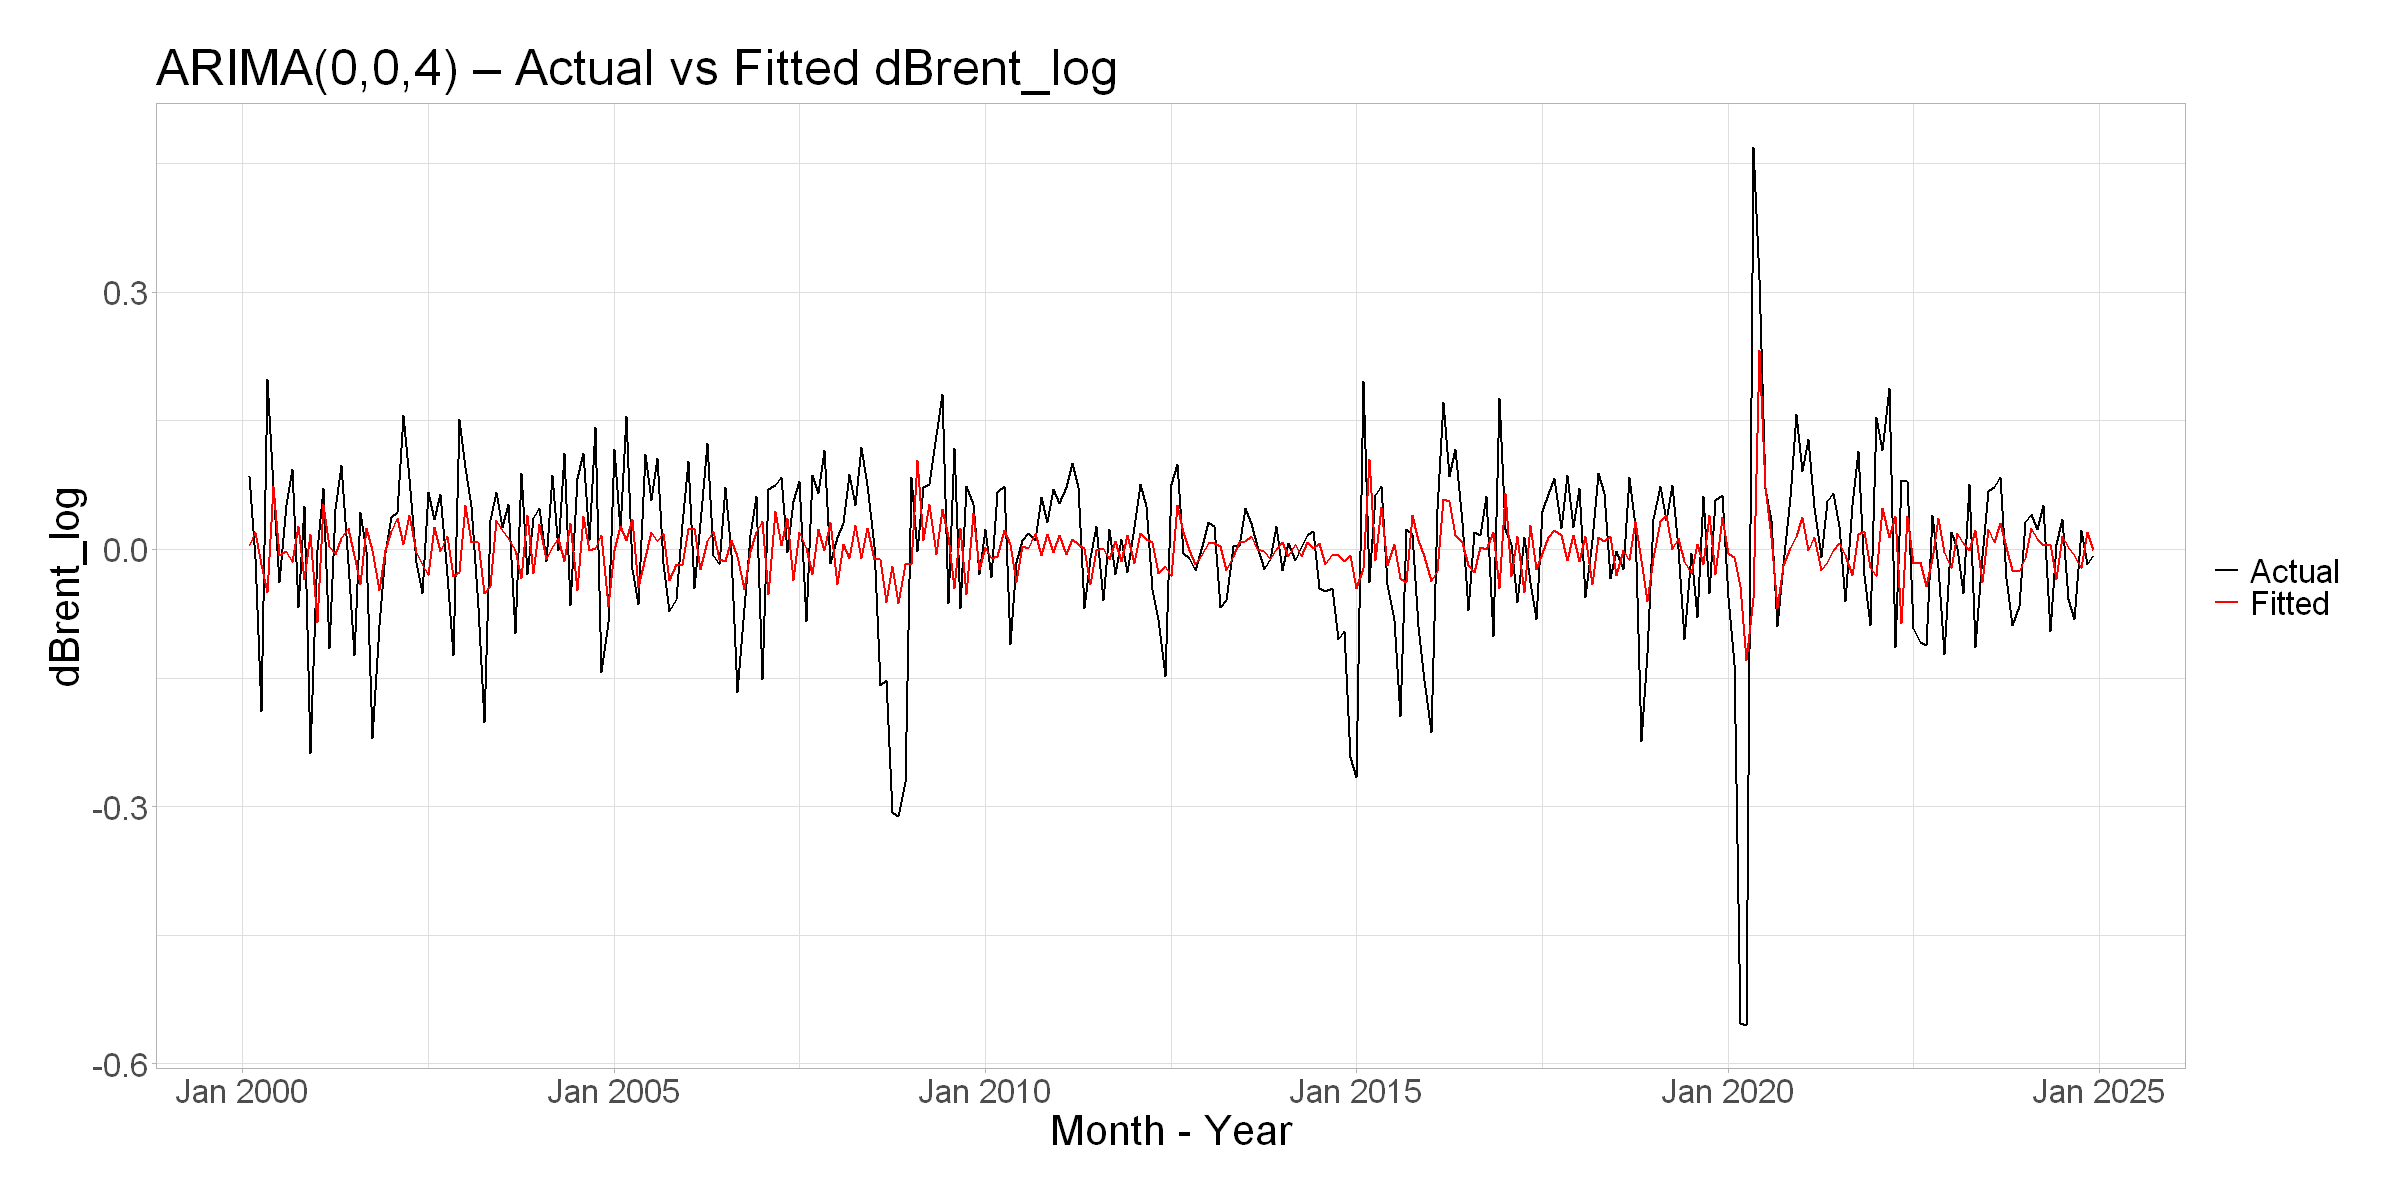

In [29]:
# dBrent_log is your xts series of log-returns
dates <- index(dBrent_log)

# Fitted values from ARIMA, coerced to numeric and put on same dates
fitted_xts <- xts(as.numeric(fitted(fit_uni)), order.by = dates)

# Combine actual and fitted into one xts object
plot_xts <- merge(Actual = dBrent_log, Fitted = fitted_xts)

# Build data frame for ggplot
plot_df <- data.frame(
  Date   = index(plot_xts),
  Actual = as.numeric(plot_xts$Actual),
  Fitted = as.numeric(plot_xts$Fitted)
)

options(repr.plot.width = 20, repr.plot.height = 10)

fig <- ggplot(plot_df, aes(x = Date)) +
  geom_line(aes(y = Actual, colour = "Actual"), linewidth = 0.7) +
  geom_line(aes(y = Fitted, colour = "Fitted"), linewidth = 0.6) +
  scale_colour_manual(values = c("Actual" = "black", "Fitted" = "red")) +
  theme_light() +
  theme(
    plot.margin = ggplot2::margin(1, 1, 1, 1, "cm"),
    text = element_text(size = 25),
    legend.title = element_blank()
  ) +
  labs(
    title = "ARIMA(0,0,4) – Actual vs Fitted dBrent_log",
    x = "Month - Year",
    y = "dBrent_log"
  )

fig

In [30]:
dim(dBrent_log)
dim(fitted_xts)

head(dBrent_log)
head(fitted_xts)

[1] 299   1

[1] 299   1

                [,1]
Feb 2000  0.08524581
Mar 2000 -0.01049404
Apr 2000 -0.18881769
May 2000  0.19787081
Jun 2000  0.07163298
Jul 2000 -0.03830838

                 [,1]
Feb 2000  0.004154238
Mar 2000  0.019868432
Apr 2000 -0.017301407
May 2000 -0.050741019
Jun 2000  0.073614611
Jul 2000 -0.006555693

In an MA(4) model, the fitted value at time *t* depends on the previous four shocks, which are not directly observable at the start of the sample. However, `auto.arima` estimates these initial shocks using maximum likelihood and backcasting, allowing the model to produce fitted values for the entire sample without introducing missing observations. This is standard in ARIMA implementations: initial states are treated as parameters and inferred jointly with the MA coefficients. As a result, `fitted(fit_uni)` contains valid values from the first period onward, even though the early fitted points rely more heavily on the estimated pre-sample shocks.

Although the ARIMA model on log-returns cannot reproduce historical price levels, its forecasts remain fully meaningful: predicted log-returns can be accumulated and exponentiated to yield price forecasts. This is standard practice in financial econometrics, where stationary return models are used to generate price forecasts through the transformation \(P_{t+h} = P_t \exp(\sum_{i=1}^h \widehat{d\log P}_{t+i})\).


In [31]:
tail(Brent)

# price forecasts
fc <- forecast(fit_uni, h = 4)

last_price <- as.numeric(last(Brent))

fc_prices <- last_price * exp(cumsum(fc$mean))
fc_prices

          [,1]
Jul 2024 85.15
Aug 2024 80.36
Sep 2024 74.02
Oct 2024 75.63
Nov 2024 74.35
Dec 2024 73.86

[1] 74.50826 74.29700 74.68592 74.73893